# IF3170 Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 01

Group Members:
- Maulvi Ziadinda Maulana (13522122)
- Ahmad Rafi Maliki (13522137)
- Nicholas Reymond Sihite (13522144)
- Albert Ghazaly (13522150)

## Install Library

In [ ]:
!pip install tensorflow

## Import Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer, PolynomialFeatures, StandardScaler, TargetEncoder, LabelEncoder, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from tensorflow.keras import layers, Model
from sklearn.pipeline import Pipeline
import pandas as pd
import time
from scipy.spatial.distance import cdist
import json
from pprint import pprint

# Import other libraries if needed

## Import Dataset

In [ ]:
# https://drive.google.com/file/d/1hfCLB6a9GV15VllTVOAT_Zh1JMHsOQE4/view?usp=sharing

metadata = pd.read_csv('https://drive.google.com/uc?id=1RWa0gt0XscTDPKcNzKj3Zqy6_uDMeF9A')
df = pd.read_csv('https://drive.google.com/uc?id=1hfCLB6a9GV15VllTVOAT_Zh1JMHsOQE4')
df = df.drop(columns=['label'])

# Show data example
df.head(10)

state       dur   sbytes    dbytes   sttl   dttl  sloss  dloss service  \
0   FIN  2.736664  13350.0  548216.0   31.0   29.0   21.0  197.0       -   
1   INT  0.000009    114.0       0.0  254.0    0.0    0.0    0.0     dns   
2   FIN  5.788526   6102.0    3892.0  254.0  252.0   13.0   13.0       -   
3   FIN  3.849634  25160.0       NaN   31.0   29.0   38.0  390.0       -   
4   CON  0.001052    130.0     162.0    NaN   29.0    0.0    0.0     dns   
5   INT  0.000005    114.0       0.0  254.0    0.0    0.0    0.0     dns   
6   INT  0.000008    114.0       0.0  254.0    0.0    0.0    0.0     dns   
7   FIN  1.465899  28660.0       NaN  254.0  252.0   14.0    3.0       -   
8   FIN  0.034137      NaN    3380.0   31.0   29.0   18.0    8.0    smtp   
9   FIN  0.022733   2958.0   33044.0   31.0   29.0    7.0   18.0       -   

          sload  ...  response_body_len  proto         sjit         djit  \
0  3.885899e+04  ...                0.0    tcp  4449.110313  3234.831566   
1  5.066666e+07  ...                0.0    udp     0.000000     0.000000   
2  8.199669e+03  ...                0.0    tcp  8561.040438   249.950547   
3  5.216912e+04  ...                0.0    tcp  4053.086020  2918.730804   
4  4.942966e+05  ...                0.0    udp     0.000000     0.000000   
5  9.120000e+07  ...                0.0    udp          NaN     0.000000   
6  5.700000e+07  ...                0.0    udp     0.000000     0.000000   
7  1.518140e+05  ...                0.0    tcp          NaN   125.553867   
8  8.617278e+06  ...                0.0    tcp    42.179459          NaN   
9  1.019487e+06  ...                0.0    tcp    25.926994    26.607684   

       sinpkt      dinpkt    tcprtt    synack    ackdat  attack_cat  
0   11.845558    6.261361       NaN  0.000444  0.000114      Normal  
1    0.009000    0.000000  0.000000  0.000000       NaN     Generic  
2  165.386453  172.345750  0.158826  0.057902  0.100924    Exploits  
3    8.669644    4.496707  0.000558  0.000448       NaN      Normal  
4    0.008000    0.007000  0.000000  0.000000  0.000000      Normal  
5    0.005000    0.000000  0.000000  0.000000  0.000000     Generic  
6    0.008000    0.000000  0.000000  0.000000  0.000000     Generic  
7   43.671909         NaN  0.140336  0.090759  0.049577     Fuzzers  
8    0.689755    0.819268  0.000667  0.000542       NaN      Normal  
9    0.477085    0.452469  0.000682  0.000559  0.000123      Normal  

[10 rows x 43 columns]

In [ ]:
print(df.columns)

Index(['state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss',
       'service', 'sload', 'dload', 'spkts', 'dpkts', 'id', 'is_sm_ips_ports',
       'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd',
       'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'swin',
       'dwin', 'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'proto', 'sjit', 'djit', 'sinpkt', 'dinpkt',
       'tcprtt', 'synack', 'ackdat', 'attack_cat'],
      dtype='object')


# Exploratory Data Analysis (Optional)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

## Metadata

In [ ]:
metadata

No.               Name    Type   \
0     5              proto  nominal   
1     6              state  nominal   
2     7                dur    Float   
3     8             sbytes  Integer   
4     9             dbytes  Integer   
5    10               sttl  Integer   
6    11               dttl  Integer   
7    12              sloss  Integer   
8    13              dloss  Integer   
9    14            service  nominal   
10   15              sload    Float   
11   16              dload    Float   
12   17              spkts  integer   
13   18              dpkts  integer   
14   19               swin  integer   
15   20               dwin  integer   
16   21              stcpb  integer   
17   22              dtcpb  integer   
18   23              smean  integer   
19   24              dmean  integer   
20   25        trans_depth  integer   
21   26  response_body_len  integer   
22   27               sjit    Float   
23   28               djit    Float   
24   31             sinpkt    Float   
25   32             dinpkt    Float   
26   33             tcprtt    Float   
27   34             synack    Float   
28   35             ackdat    Float   
29   36    is_sm_ips_ports   Binary   
30   37       ct_state_ttl  Integer   
31   38   ct_flw_http_mthd  Integer   
32   39       is_ftp_login   Binary   
33   40         ct_ftp_cmd  integer   
34   41         ct_srv_src  integer   
35   42         ct_srv_dst  integer   
36   43         ct_dst_ltm  integer   
37   44         ct_src_ltm  integer   
38   45   ct_src_dport_ltm  integer   
39   46   ct_dst_sport_ltm  integer   
40   47     ct_dst_src_ltm  integer   
41   48         attack_cat  nominal   
42   49              label   binary   

                                          Description feature_type  
0                                Transaction protocol         flow  
1   Indicates to the state and its dependent proto...        basic  
2                               Record total duration        basic  
3            Source to destination transaction bytes         basic  
4             Destination to source transaction bytes        basic  
5           Source to destination time to live value         basic  
6            Destination to source time to live value        basic  
7            Source packets retransmitted or dropped         basic  
8        Destination packets retransmitted or dropped        basic  
9   http, ftp, smtp, ssh, dns, ftp-data ,irc  and ...        basic  
10                             Source bits per second        basic  
11                        Destination bits per second        basic  
12                Source to destination packet count         basic  
13                 Destination to source packet count        basic  
14              Source TCP window advertisement value      content  
15         Destination TCP window advertisement value      content  
16                    Source TCP base sequence number      content  
17               Destination TCP base sequence number      content  
18  Mean of the ?ow packet size transmitted by the...      content  
19  Mean of the ?ow packet size transmitted by the...      content  
20  Represents the pipelined depth into the connec...      content  
21  Actual uncompressed content size of the data t...      content  
22                               Source jitter (mSec)         time  
23                          Destination jitter (mSec)         time  
24             Source interpacket arrival time (mSec)         time  
25        Destination interpacket arrival time (mSec)         time  
26  TCP connection setup round-trip time, the sum ...         time  
27  TCP connection setup time, the time between th...         time  
28  TCP connection setup time, the time between th...         time  
29  If source (1) and destination (3)IP addresses ...   additional  
30  No. for each state (6) according to specific r...   additional  
31  No. of flows that has methods such as Get and ...   additional  
32  If the

## Dataset Basic Information


In [ ]:
print(f"Total number of records: {len(df)}")
print(f"Number of features: {len(df.columns)}")
print("\nData Types:")
print(df.dtypes)

Total number of records: 175341
Number of features: 43

Data Types:
state                 object
dur                  float64
sbytes               float64
dbytes               float64
sttl                 float64
dttl                 float64
sloss                float64
dloss                float64
service               object
sload                float64
dload                float64
spkts                float64
dpkts                float64
id                     int64
is_sm_ips_ports      float64
ct_state_ttl         float64
ct_flw_http_mthd     float64
is_ftp_login         float64
ct_ftp_cmd           float64
ct_srv_src           float64
ct_srv_dst           float64
ct_dst_ltm           float64
ct_src_ltm           float64
ct_src_dport_ltm     float64
ct_dst_sport_ltm     float64
ct_dst_src_ltm       float64
swin                 float64
dwin                 float64
stcpb                float64
dtcpb                float64
smean                float64
dmean                float64
tran

## Data type for each features

In [ ]:
metadata = metadata.rename(columns={'Type ':'Type'})
metadata['Type'] = metadata['Type'].str.lower()
metadata[['Name', 'Type']]

Name     Type
0               proto  nominal
1               state  nominal
2                 dur    float
3              sbytes  integer
4              dbytes  integer
5                sttl  integer
6                dttl  integer
7               sloss  integer
8               dloss  integer
9             service  nominal
10              sload    float
11              dload    float
12              spkts  integer
13              dpkts  integer
14               swin  integer
15               dwin  integer
16              stcpb  integer
17              dtcpb  integer
18              smean  integer
19              dmean  integer
20        trans_depth  integer
21  response_body_len  integer
22               sjit    float
23               djit    float
24             sinpkt    float
25             dinpkt    float
26             tcprtt    float
27             synack    float
28             ackdat    float
29    is_sm_ips_ports   binary
30       ct_state_ttl  integer
31   ct_flw_http_mthd  integer
32       is_ftp_login   binary
33         ct_ftp_cmd  integer
34         ct_srv_src  integer
35         ct_srv_dst  integer
36         ct_dst_ltm  integer
37         ct_src_ltm  integer
38   ct_src_dport_ltm  integer
39   ct_dst_sport_ltm  integer
40     ct_dst_src_ltm  integer
41         attack_cat  nominal
42              label   binary

## Descriptive Statistics

In [ ]:
numeric_columns = metadata.loc[(metadata['Type']=='float') | (metadata['Type']=='integer')]['Name']
categorical_columns = metadata.loc[(metadata['Type']!='float') & (metadata['Type']!='integer')]['Name']

print("Numeric Columns:")
print(numeric_columns)
print("\nCategorical Columns:")
print(categorical_columns)

# Exclude 'label' from categorical columns
categorical_columns = categorical_columns[categorical_columns != 'label']


# Numeric columns descriptive
df[numeric_columns].describe().T


# possible values for each categorical columns
for column in categorical_columns:
    print(f"\nPossible values for {column}:")
    print(df[column].unique())

Numeric Columns:
2                   dur
3                sbytes
4                dbytes
5                  sttl
6                  dttl
7                 sloss
8                 dloss
10                sload
11                dload
12                spkts
13                dpkts
14                 swin
15                 dwin
16                stcpb
17                dtcpb
18                smean
19                dmean
20          trans_depth
21    response_body_len
22                 sjit
23                 djit
24               sinpkt
25               dinpkt
26               tcprtt
27               synack
28               ackdat
30         ct_state_ttl
31     ct_flw_http_mthd
33           ct_ftp_cmd
34           ct_srv_src
35           ct_srv_dst
36           ct_dst_ltm
37           ct_src_ltm
38     ct_src_dport_ltm
39     ct_dst_sport_ltm
40       ct_dst_src_ltm
Name: Name, dtype: object

Categorical Columns:
0               proto
1               state
9             service
29   

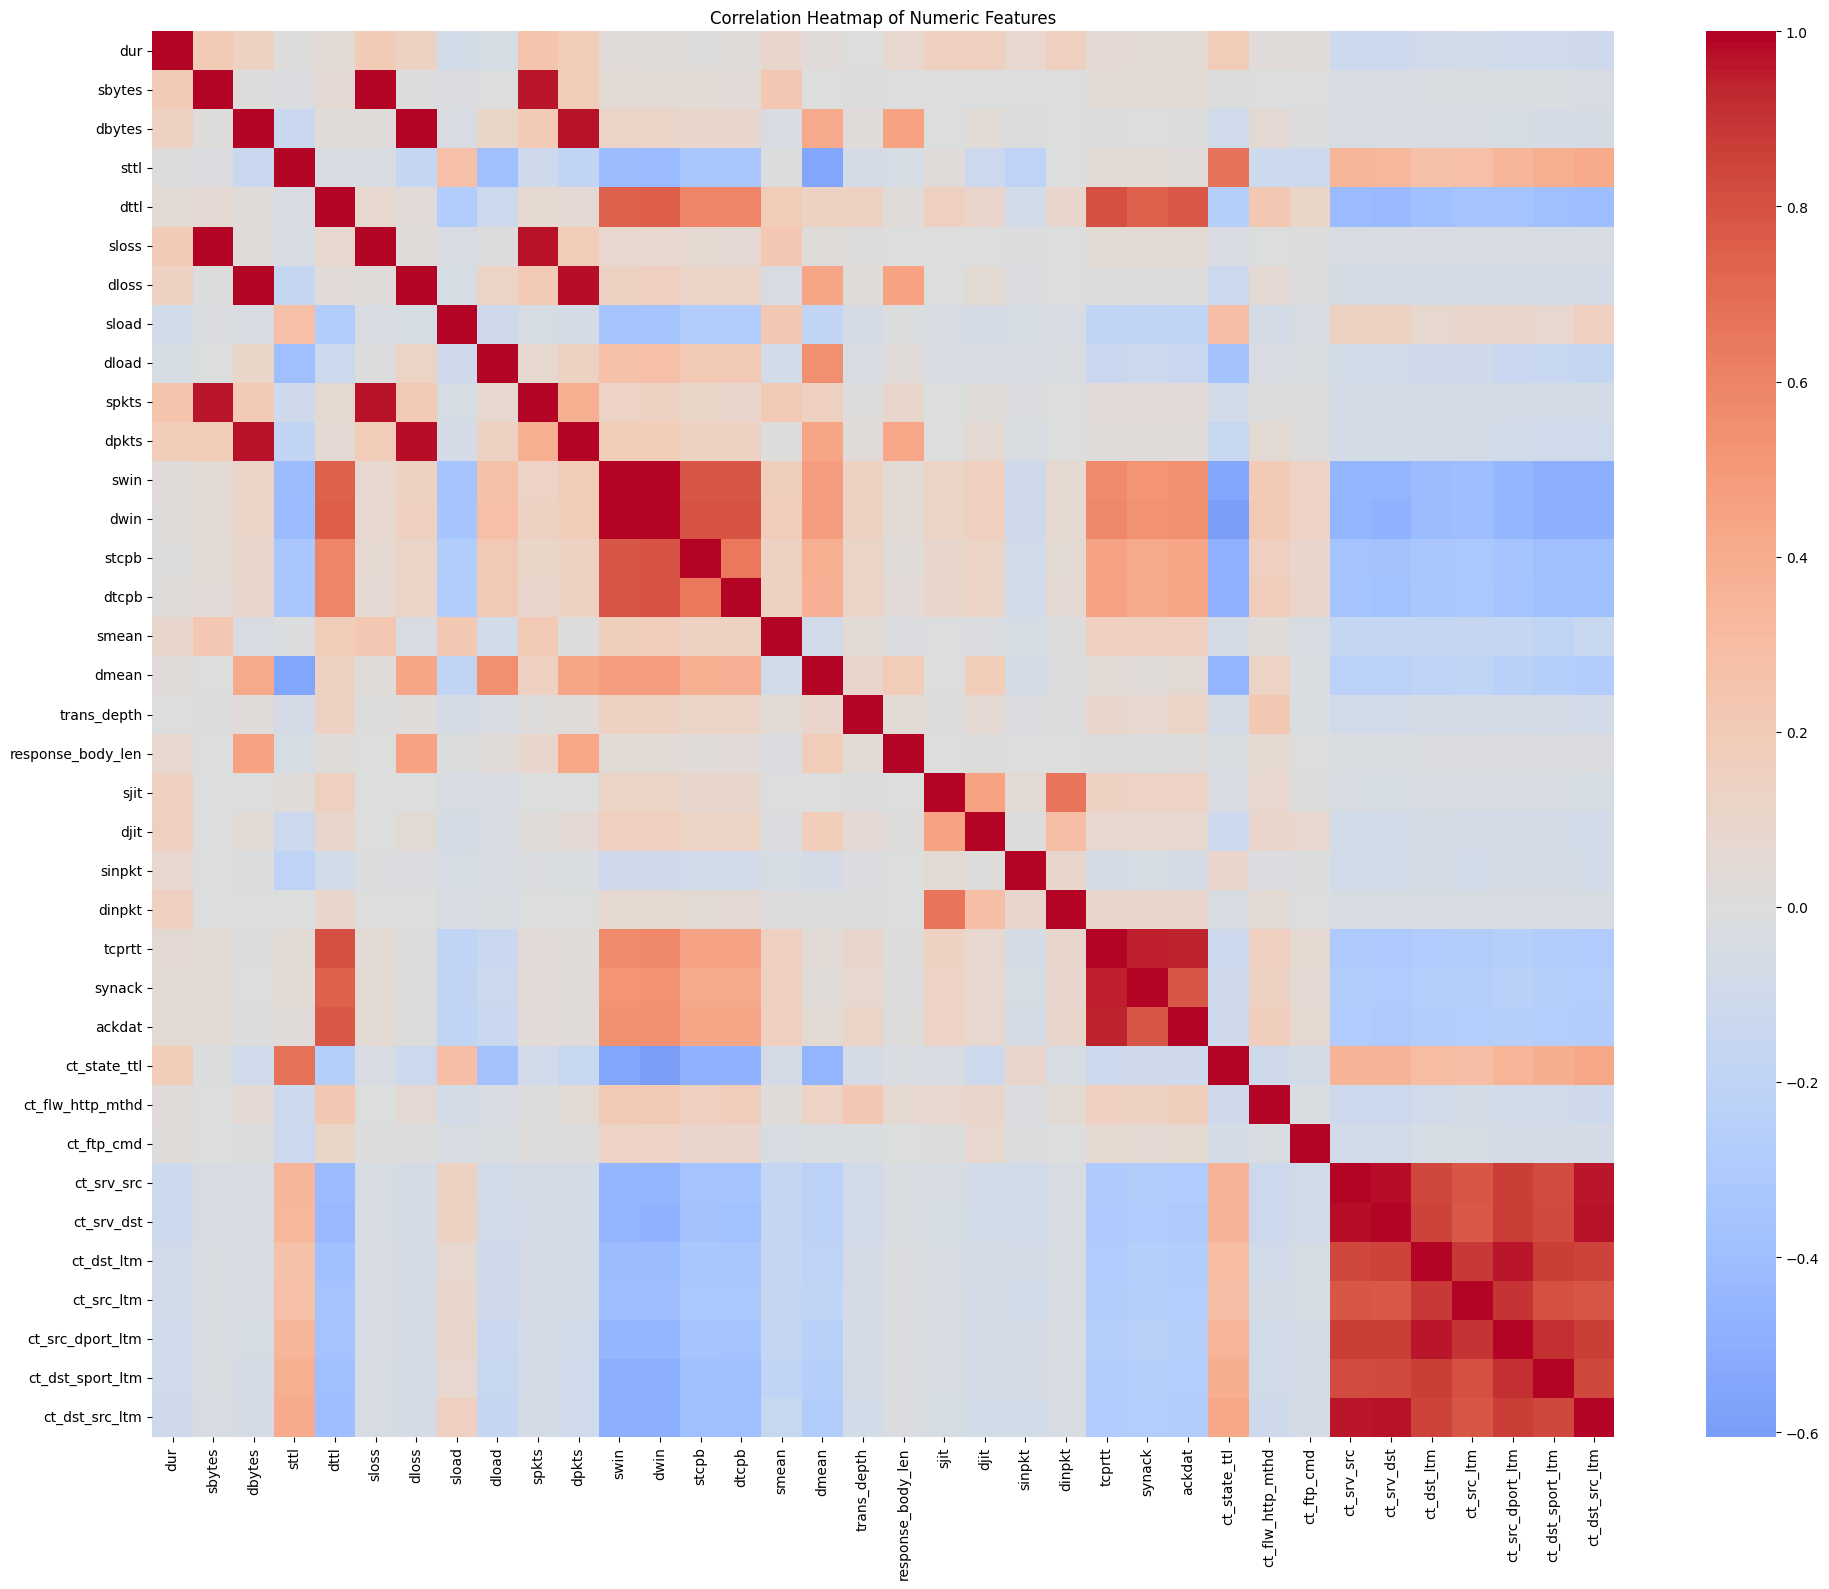

In [ ]:
plt.figure(figsize=(20, 16))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

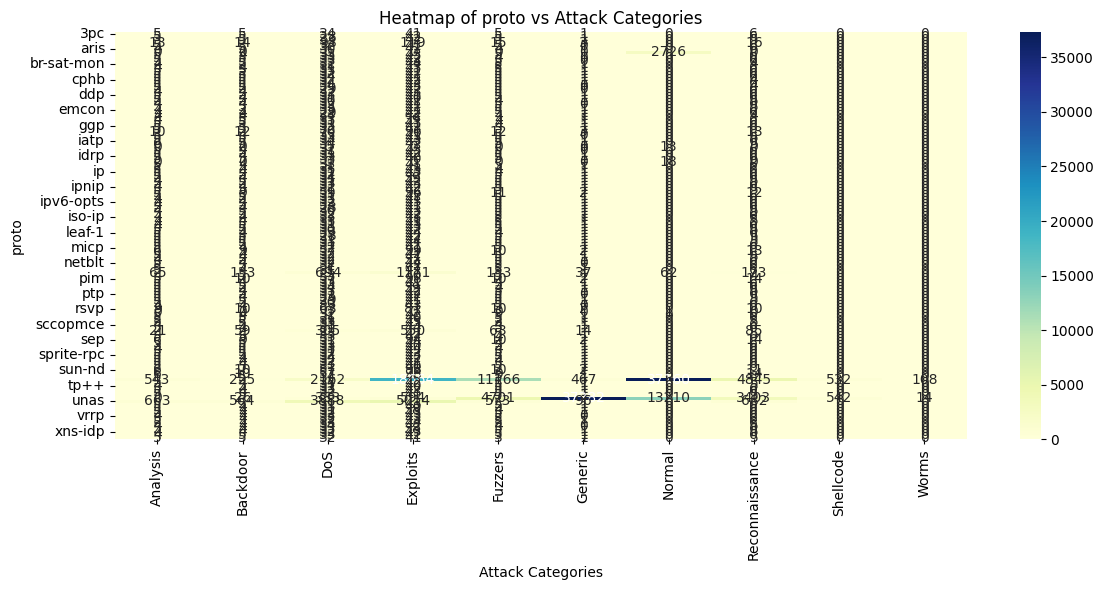

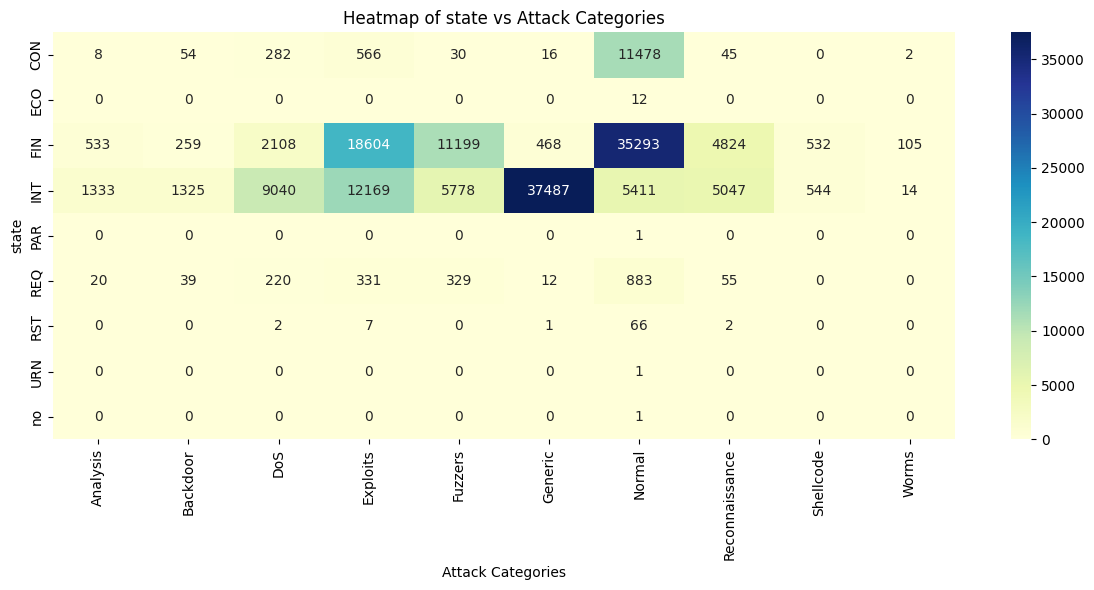

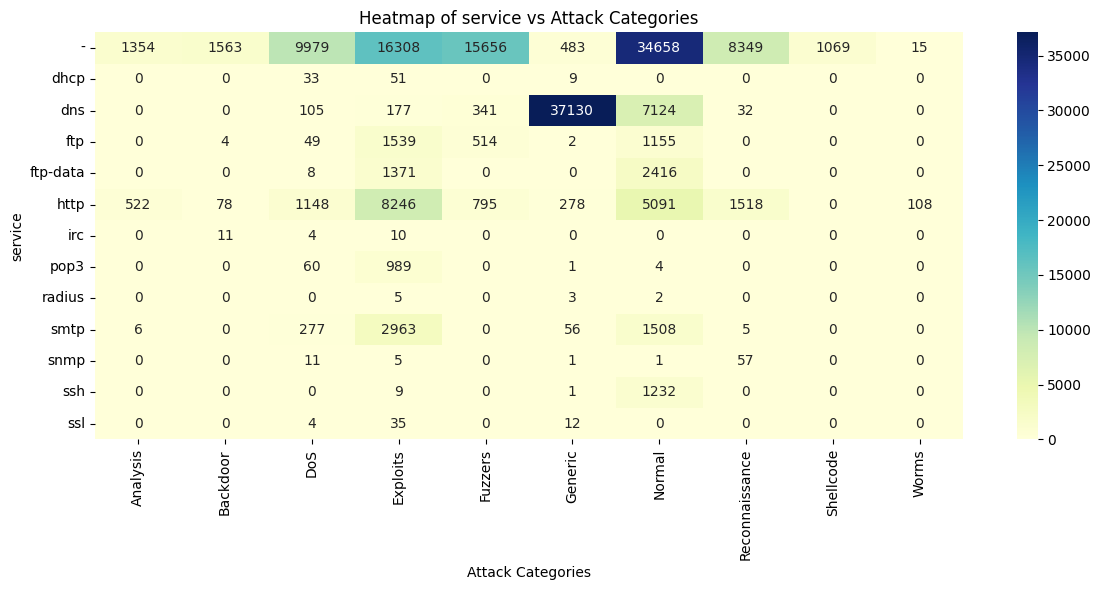

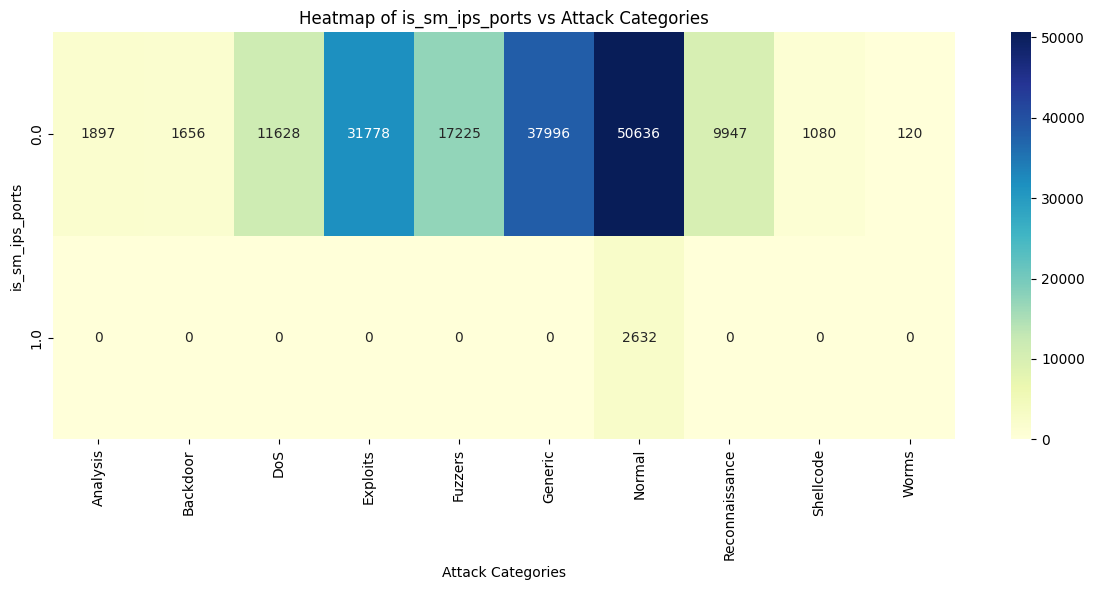

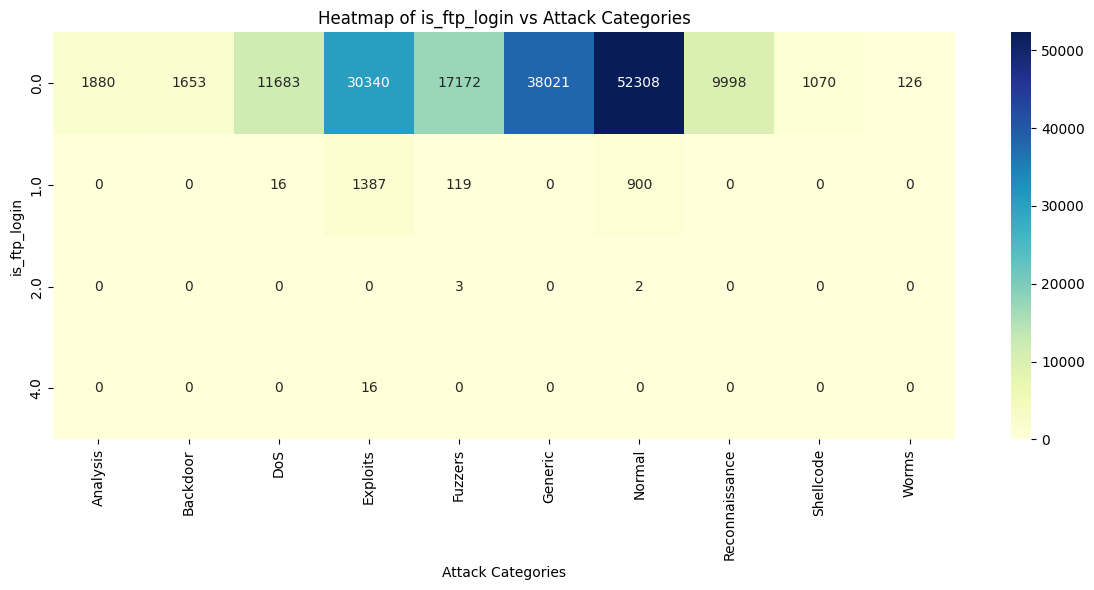

In [ ]:
for column in categorical_columns:
    if column == 'attack_cat':
        continue
    # Create a crosstab between the column and 'attack_cat'
    crosstab = pd.crosstab(df[column], df['attack_cat'])

    # Plot heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(crosstab, annot=True, fmt="d", cmap="YlGnBu")
    plt.title(f"Heatmap of {column} vs Attack Categories")
    plt.xlabel("Attack Categories")
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()

# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [ ]:
# Split training set and validation set here, store into variables train_set and val_set.
# Remember to also keep the original training set before splitting. This will come important later.
# train_set, val_set = ...

# Untuk mengubah rasio perpisahan data, ganti variabel 'test_size'
# Pada kode di bawah, 0.3 artinya 33% dari data di 'df' digunakan untuk val_set (ngikut PPT)
train_set, val_set = train_test_split(df, test_size=0.33, random_state=42, stratify=df['attack_cat'])

# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

#### Missing Value Analysis

In [ ]:
missing_values = df.isnull().sum()
missing_percentage = 100 * missing_values / len(df)
missing_table = pd.concat([missing_values, missing_percentage], axis=1, keys=['Missing Count', 'Missing Percentage'])
missing_table = missing_table.reset_index()
missing_table = missing_table.rename(columns={'index': 'Name'})
merged_table = pd.merge(missing_table, metadata[['Name', 'Type']], on='Name', how='left')
merged_table[merged_table['Missing Count'] > 0]

Name  Missing Count  Missing Percentage     Type
0               state           8805            5.021644  nominal
1                 dur           8722            4.974307    float
2              sbytes           8561            4.882486  integer
3              dbytes           8869            5.058144  integer
4                sttl           8825            5.033050  integer
5                dttl           8654            4.935526  integer
6               sloss           8794            5.015370  integer
7               dloss           8978            5.120308  integer
8             service           8791            5.013659  nominal
9               sload           8786            5.010808    float
10              dload           8837            5.039894    float
11              spkts           8654            4.935526  integer
12              dpkts           8686            4.953776  integer
14    is_sm_ips_ports           8746            4.987995   binary
15       ct_state_ttl           8635            4.924690  integer
16   ct_flw_http_mthd           8647            4.931533  integer
17       is_ftp_login           8647            4.931533   binary
18         ct_ftp_cmd           8842            5.042745  integer
19         ct_srv_src           8851            5.047878  integer
20         ct_srv_dst           8774            5.003964  integer
21         ct_dst_ltm           8738            4.983432  integer
22         ct_src_ltm           8823            5.031909  integer
23   ct_src_dport_ltm           8775            5.004534  integer
24   ct_dst_sport_ltm           8788            5.011948  integer
25     ct_dst_src_ltm           8895            5.072972  integer
26               swin           8740            4.984573  integer
27               dwin           8779            5.006815  integer
28              stcpb           8672            4.945791  integer
29              dtcpb           8803            5.020503  integer
30              smean           8788            5.011948  integer
31              dmean           8855            5.050159  integer
32        trans_depth           8785            5.010237  integer
33  response_body_len           8791            5.013659  integer
34              proto           8826            5.033620  nominal
35               sjit           8738            4.983432    float
36               djit           8846            5.045027    float
37             sinpkt           8707            4.965752    float
38             dinpkt           8734            4.981151    float
39             tcprtt           8836            5.039323    float
40             synack           8736            4.982292    float
41             ackdat           8595            4.901877    float

#### Impute Missing Data Function

In [ ]:
class CustomImputer(BaseEstimator, TransformerMixin):
    def __init__(self, numeric_columns=None, categorical_columns=None):
        self.numeric_columns = numeric_columns
        self.categorical_columns = categorical_columns
        self.numeric_imputer_ = SimpleImputer(strategy='mean')
        self.categorical_imputer_ = SimpleImputer(strategy='most_frequent')

    def fit(self, X, y=None):
        if self.numeric_columns is None:
            self.numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

        if self.categorical_columns is None:
            self.categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()

        if len(self.numeric_columns) > 0:  # Check if numeric_columns is not empty
            self.numeric_imputer_.fit(X[self.numeric_columns])

        if len(self.categorical_columns) > 0:  # Check if categorical_columns is not empty
            self.categorical_imputer_.fit(X[self.categorical_columns])

        return self

    def transform(self, X):
        X_transformed = X.copy()

        X_transformed.replace('-', np.nan, inplace=True)

        if len(self.numeric_columns) > 0:  # Check if numeric_columns is not empty
            X_transformed[self.numeric_columns] = self.numeric_imputer_.transform(X_transformed[self.numeric_columns])

        if len(self.categorical_columns) > 0:  # Check if categorical_columns is not empty
            X_transformed[self.categorical_columns] = self.categorical_imputer_.transform(X_transformed[self.categorical_columns])

        return X_transformed

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)


### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

#### Outlier Analysis


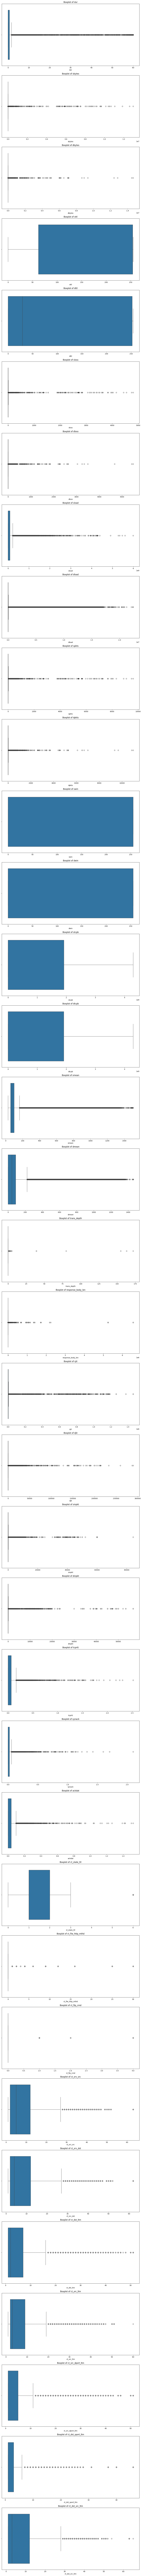

In [ ]:
num_columns = len(numeric_columns)
plt.figure(figsize=(12, 6 * num_columns))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_columns, 1, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

#### Data Distribution

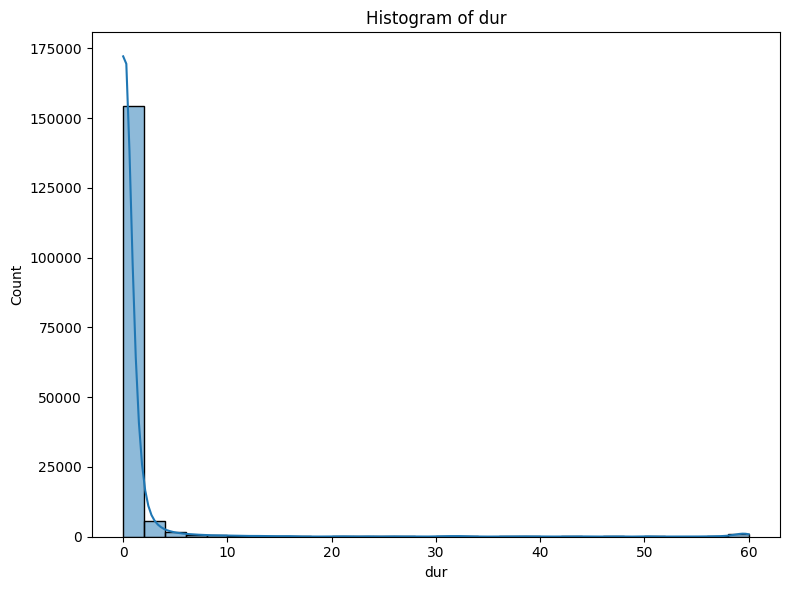

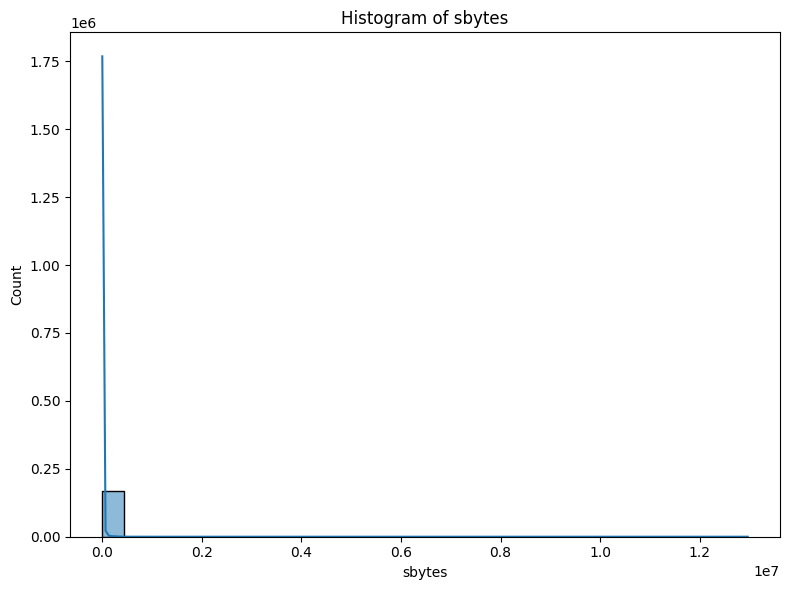

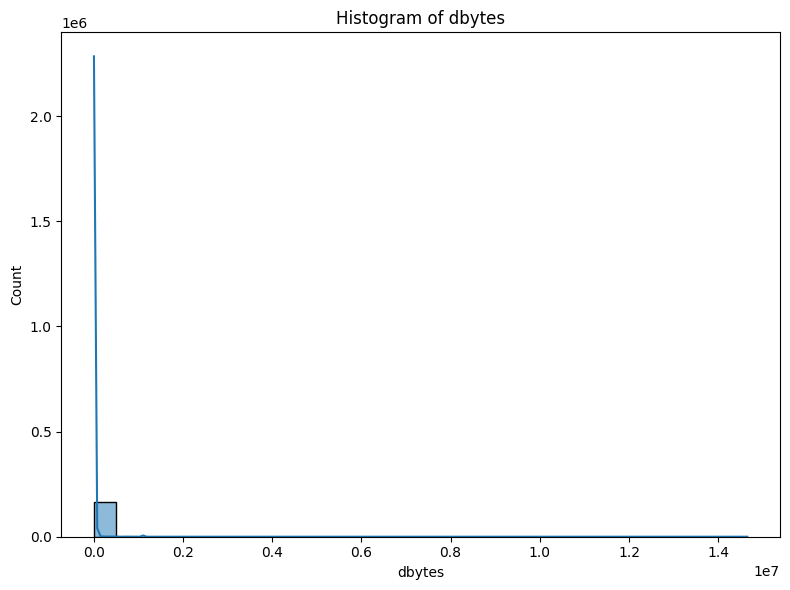

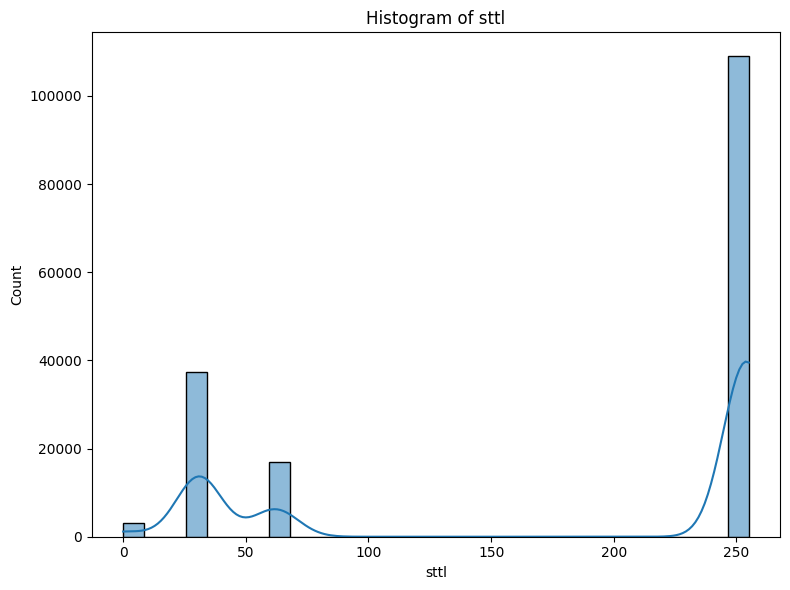

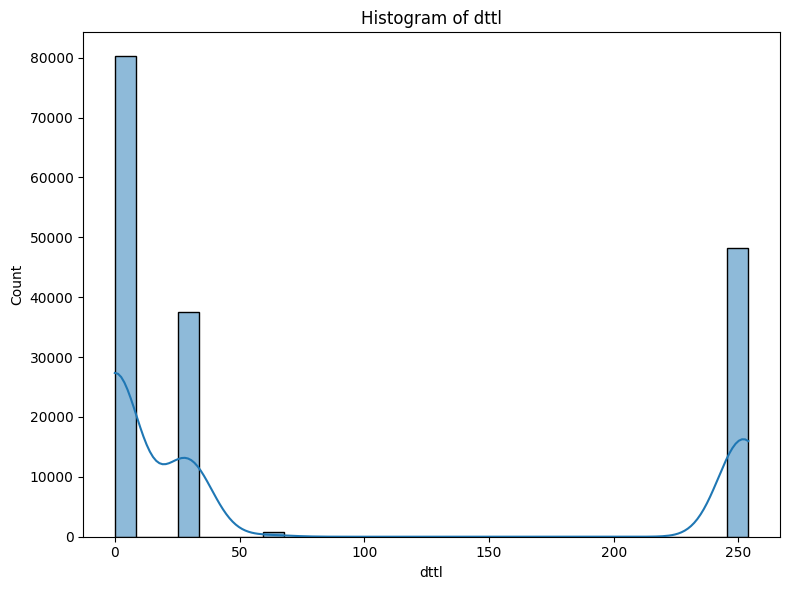

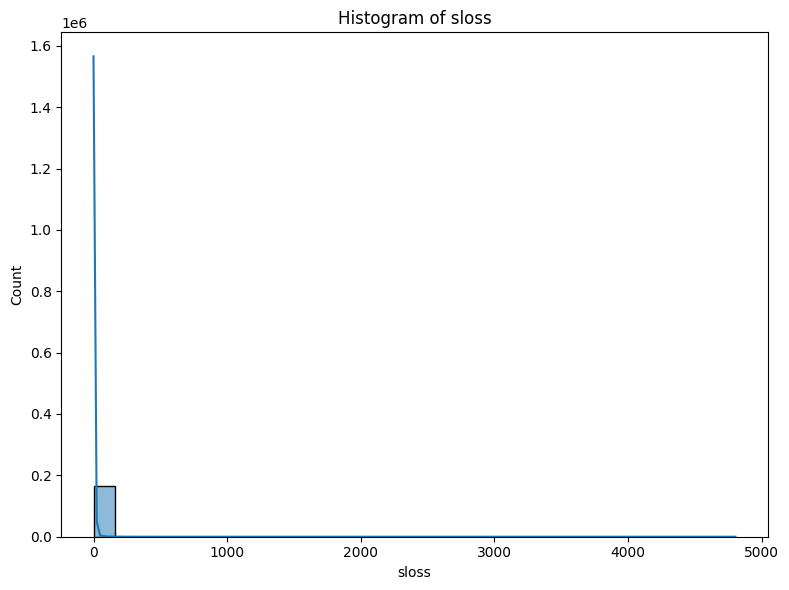

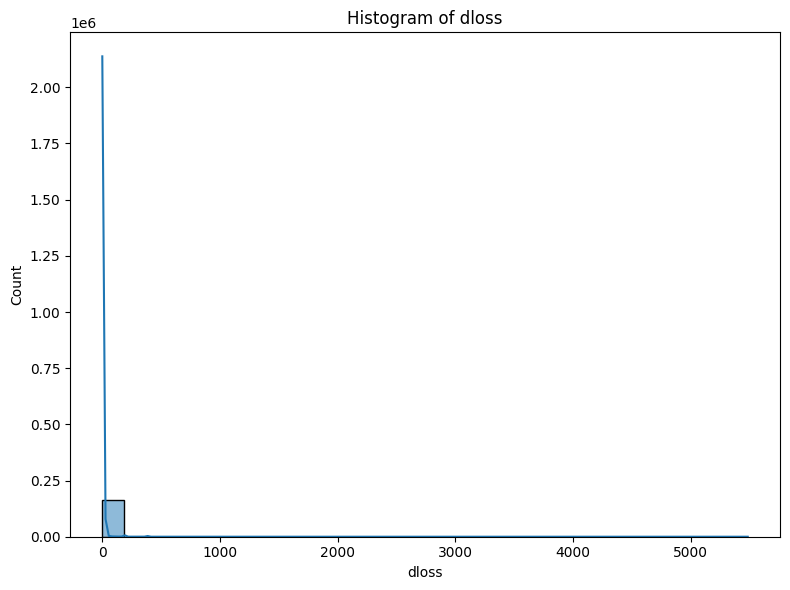

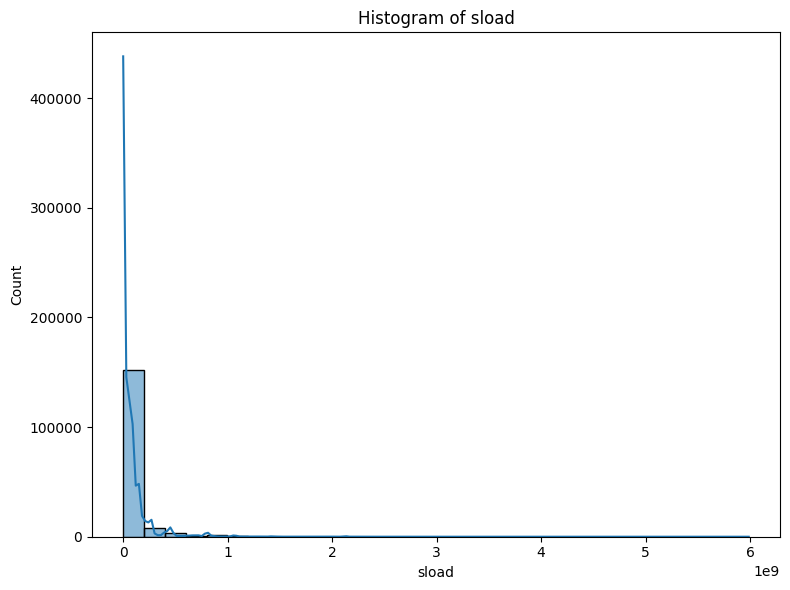

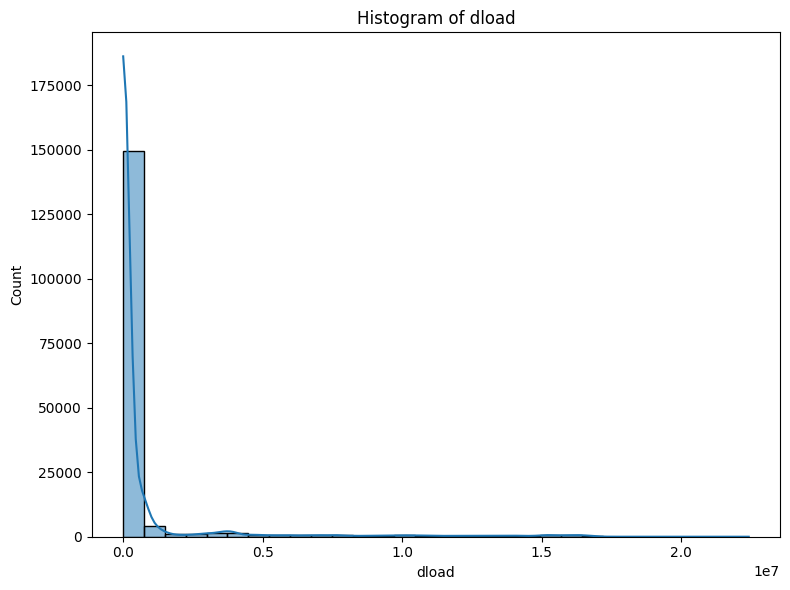

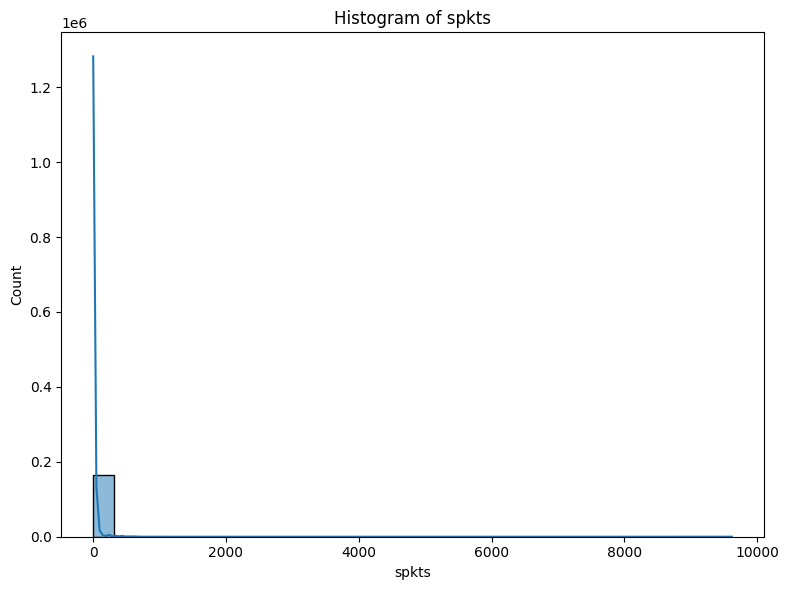

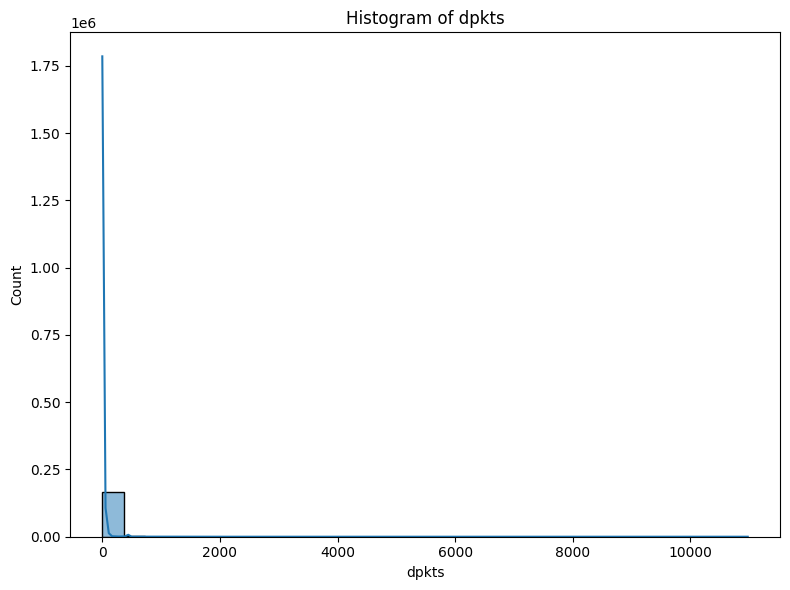

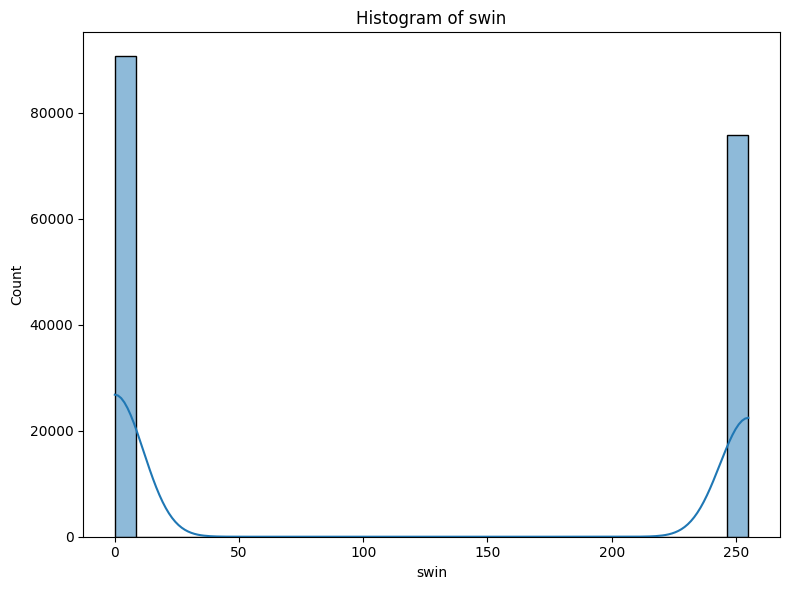

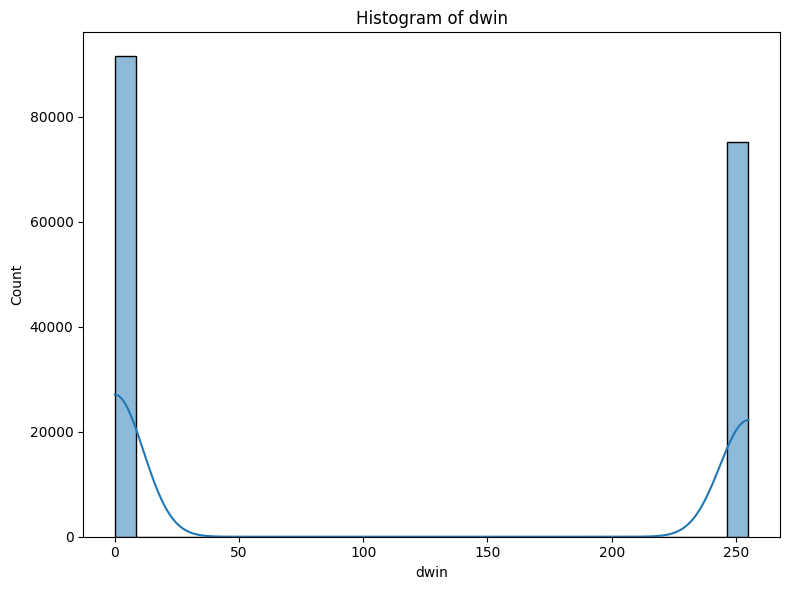

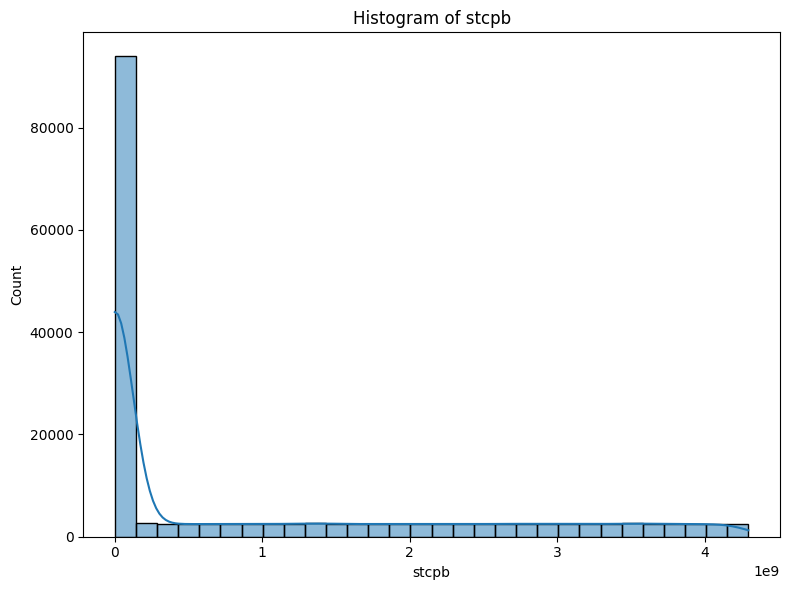

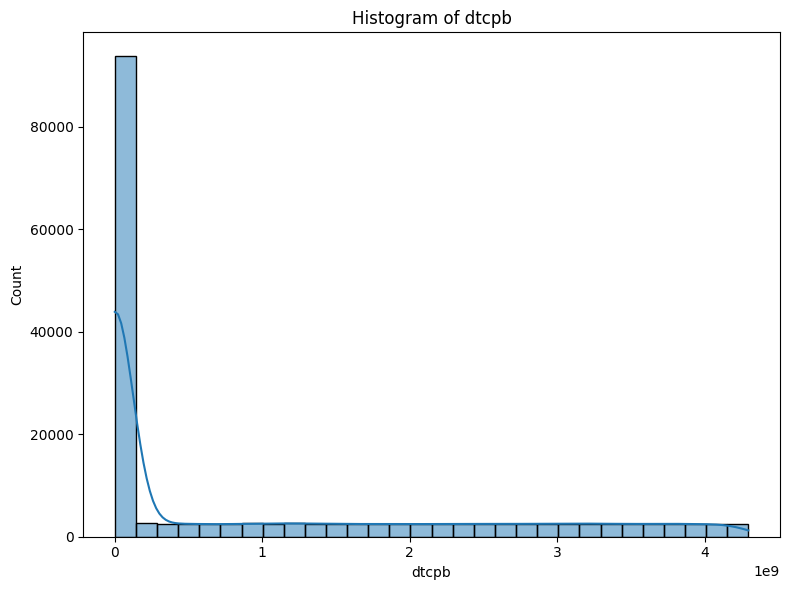

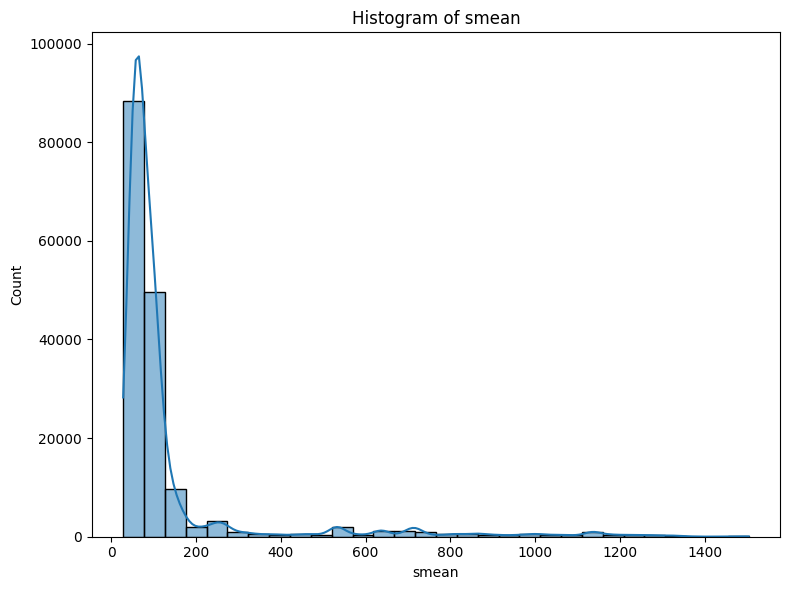

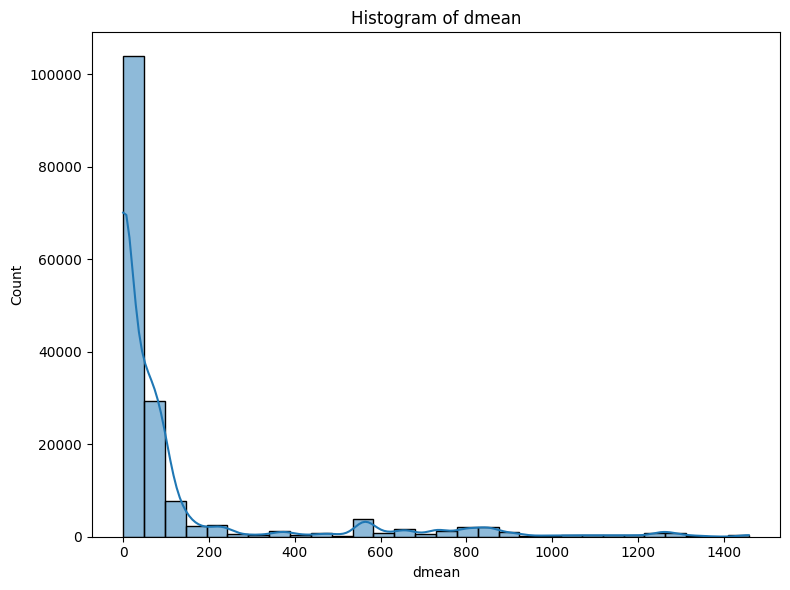

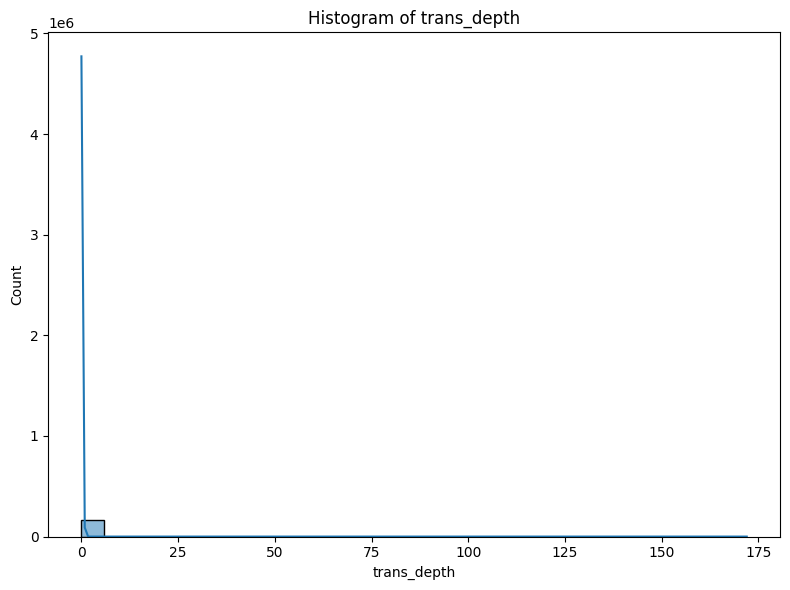

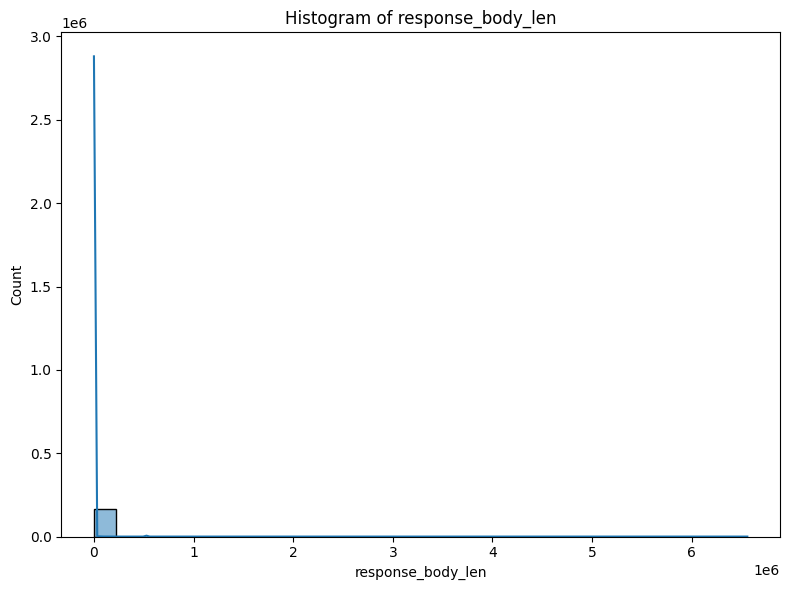

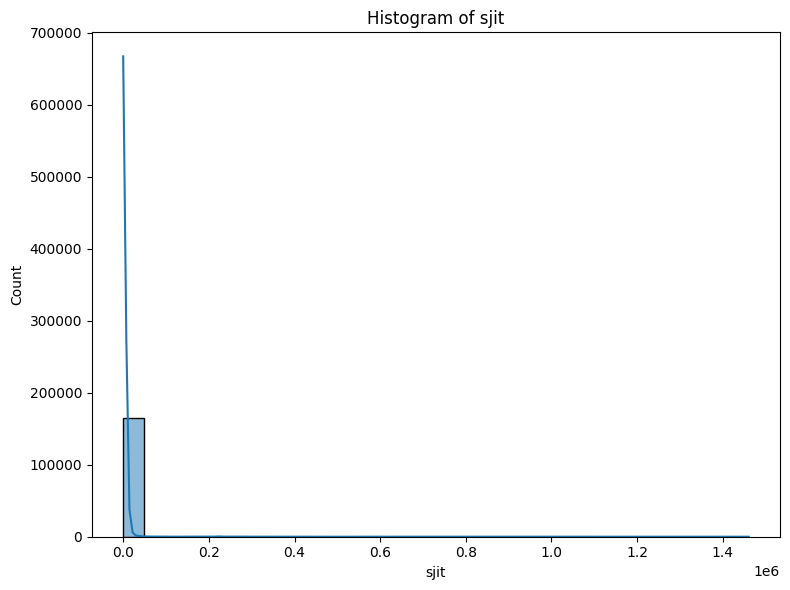

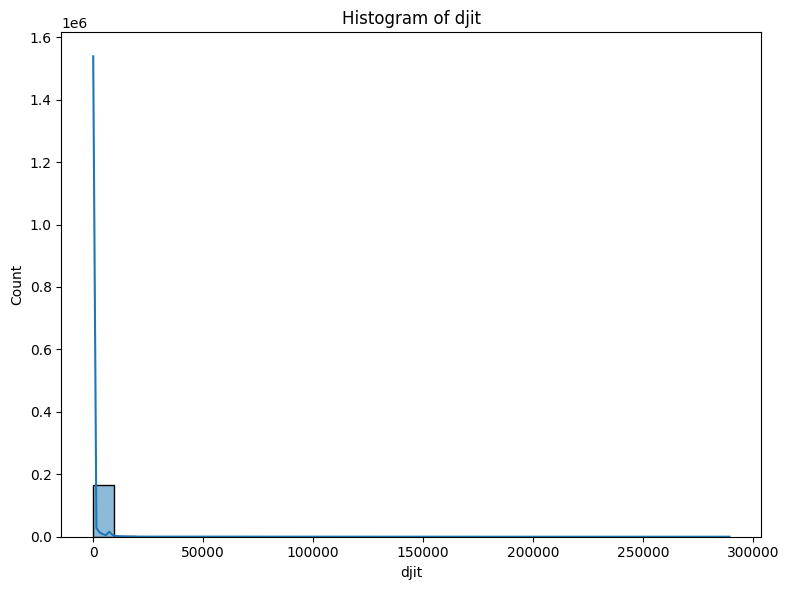

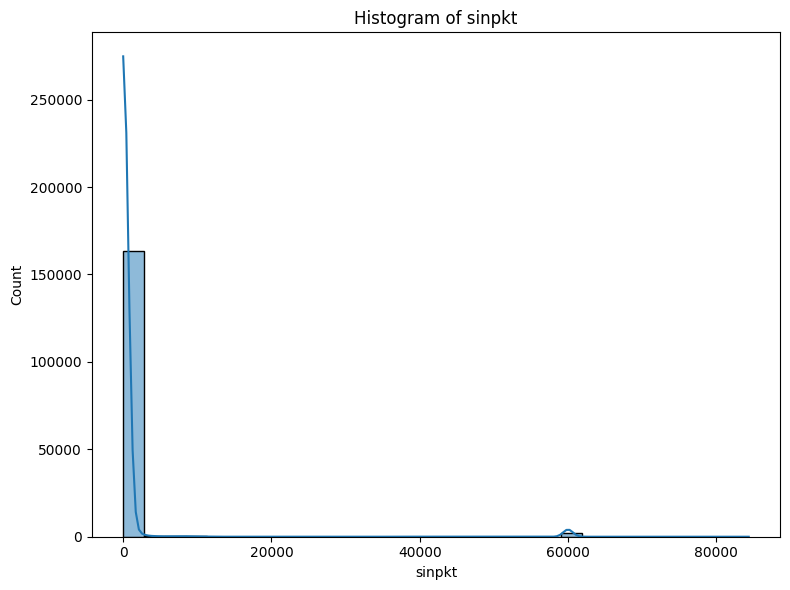

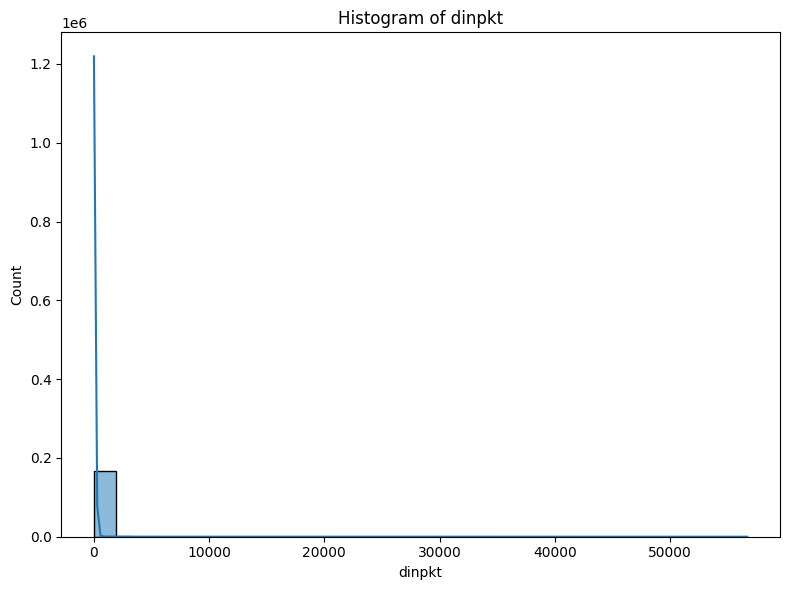

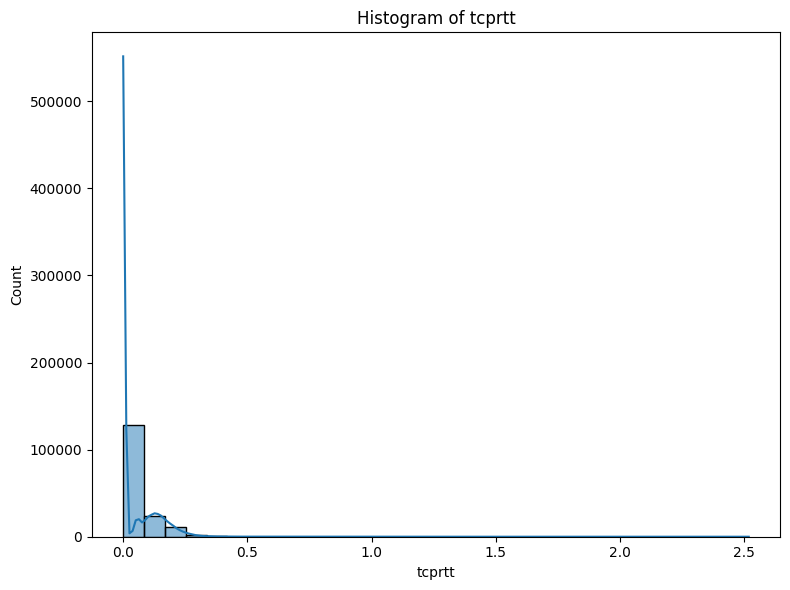

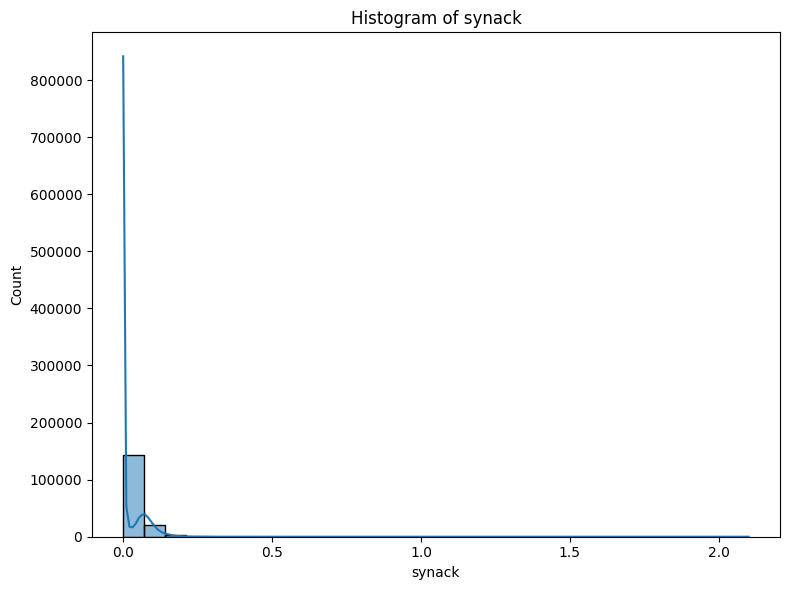

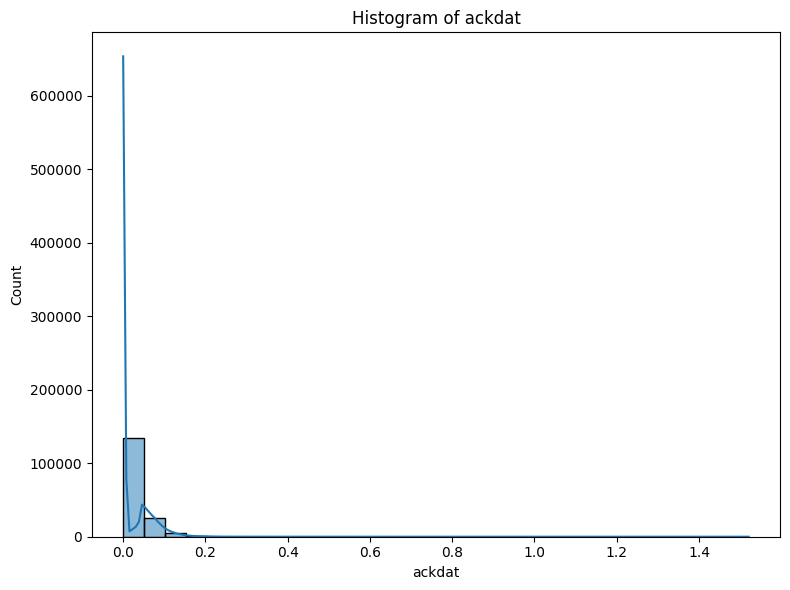

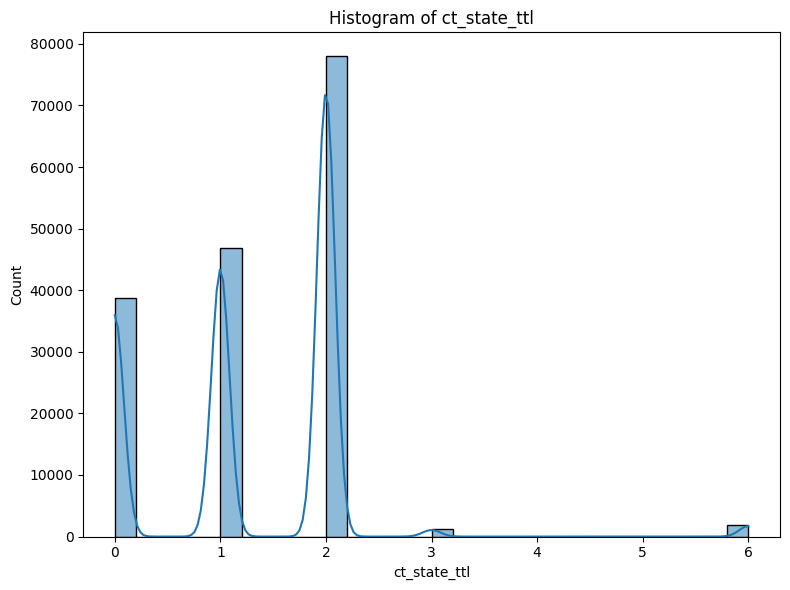

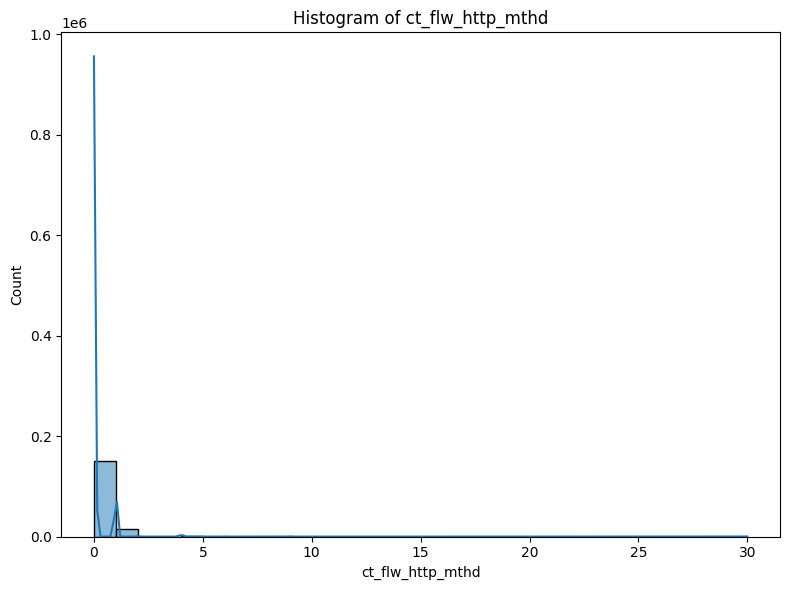

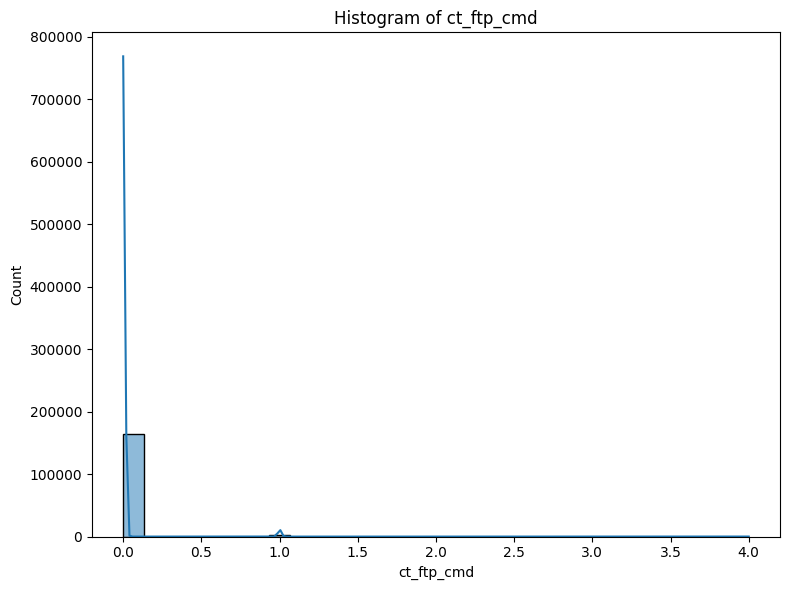

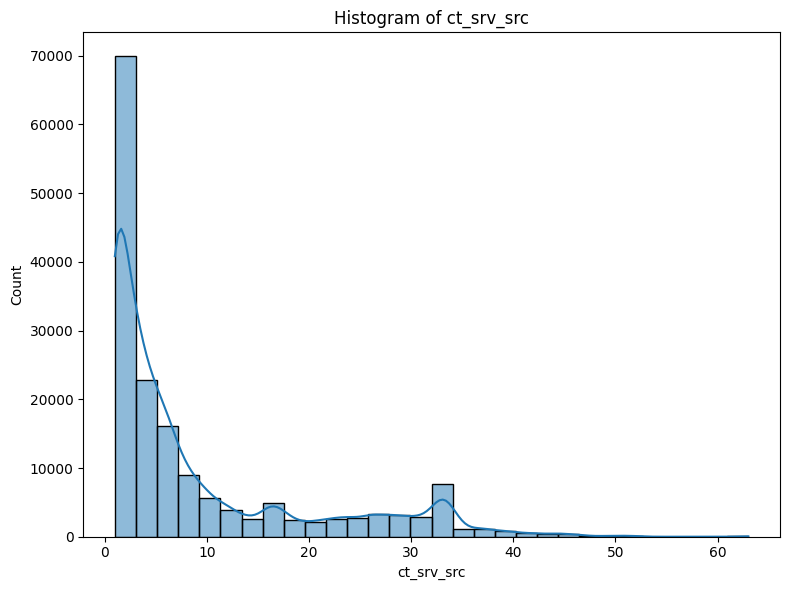

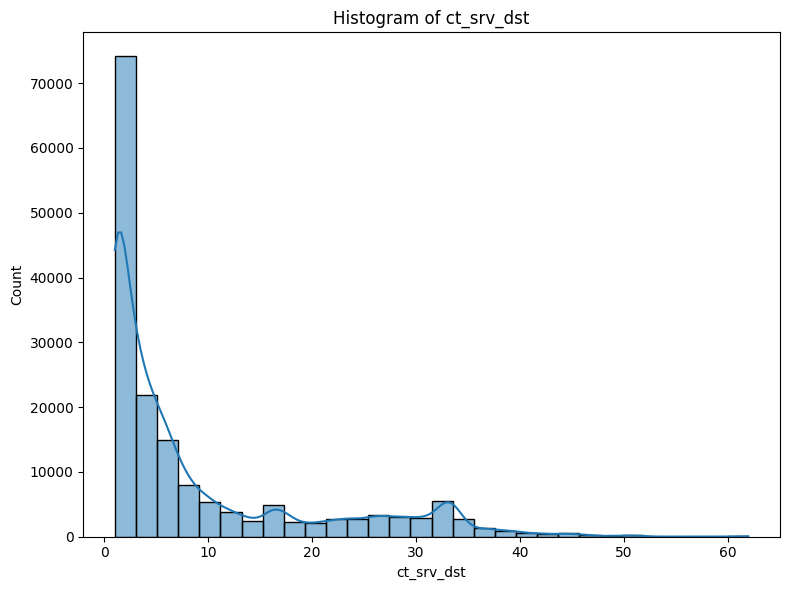

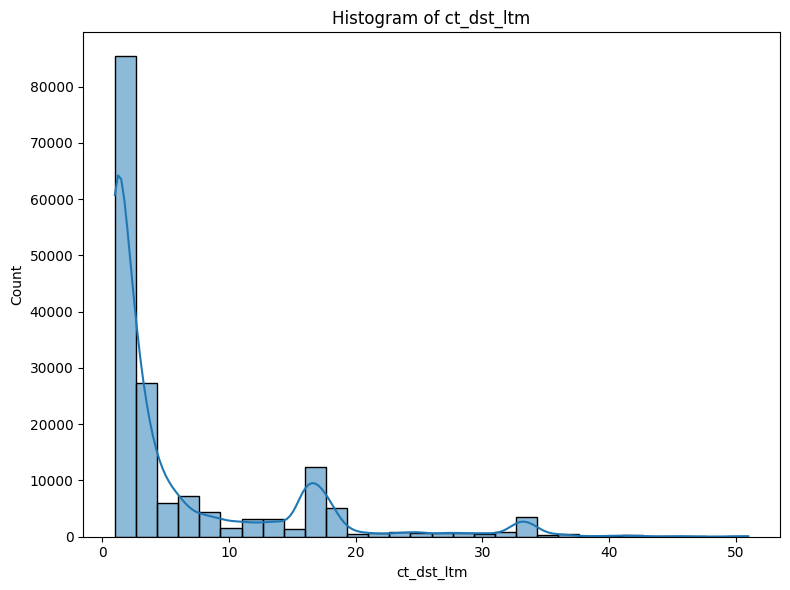

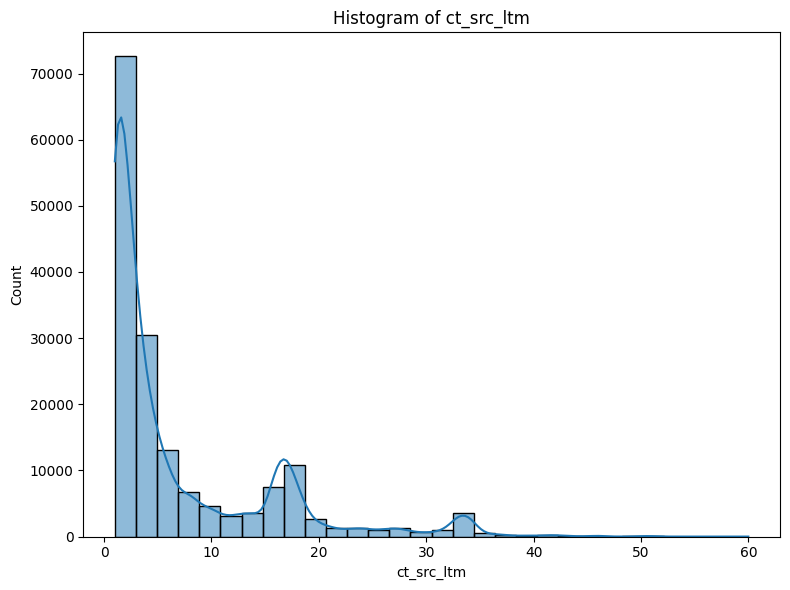

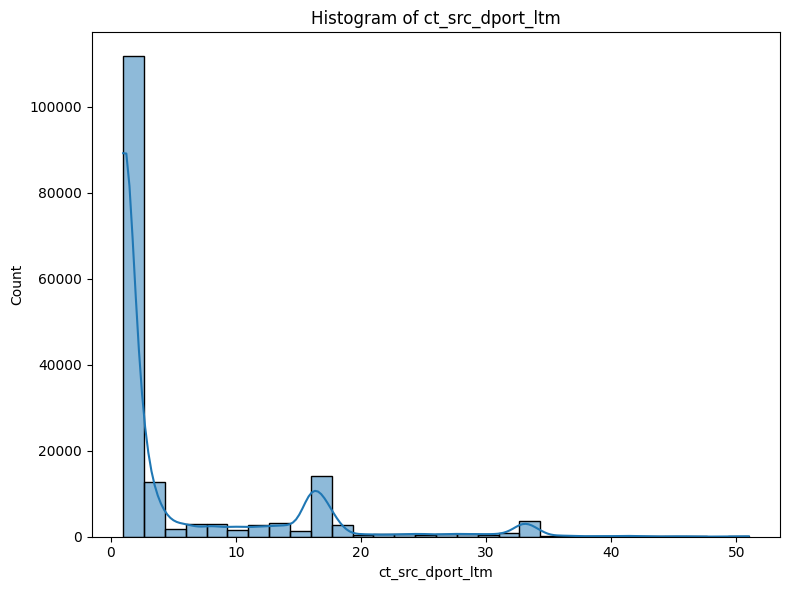

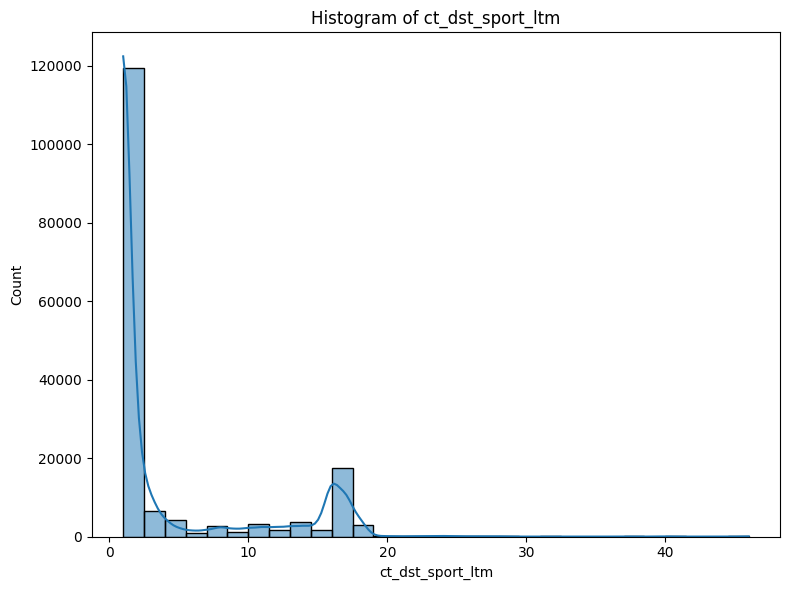

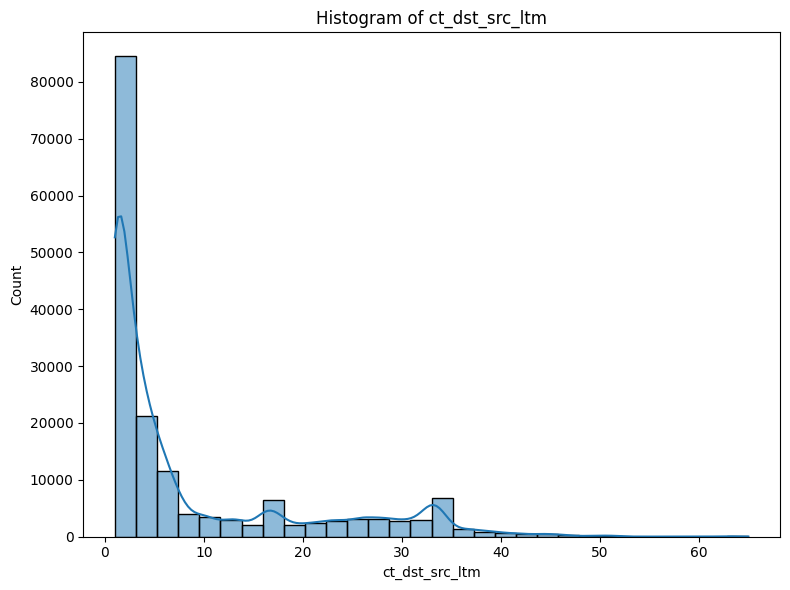

In [ ]:
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True, bins=30)
    plt.title(f'Histogram of {column}')
    plt.tight_layout()
    plt.show()

#### Outlier Handling Function

In [ ]:
def handleOutlier(df):
  for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median = df[column].median()

    df[column] = np.where(df[column] < lower_bound, median, df[column])  # Replace with median
    df[column] = np.where(df[column] > upper_bound, median, df[column])  # Replace with median

  return df

### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

#### Remove Duplicate Function

In [ ]:
def removeDuplicates(df):
  df =  df.drop_duplicates()

  return df

### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

#### Feature Engineering Function

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import f_classif
import numpy as np
import pandas as pd


class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self, numeric_columns=None, categorical_columns=None):
        self.numeric_columns = numeric_columns
        self.categorical_columns = categorical_columns
        self.columns_to_drop = []

    def fit(self, X, y=None):
        # Ensure target column is passed as y
        if y is None:
            raise ValueError("The target variable 'y' must be provided for the feature engineering process.")

        # Step 1: Identify numeric columns with low variance
        if len(self.numeric_columns) > 0:
            numeric_data = X[self.numeric_columns]
            variances = numeric_data.var()
            low_variance_columns = variances[variances < 0.01].index.tolist()
        else:
            low_variance_columns = []

        # Step 2: Remove irrelevant columns
        irrelevant_columns = ['id']

        # Step 3: Feature importance analysis (numeric vs categorical target)
        if len(self.numeric_columns) > 0:
            numeric_data = X[self.numeric_columns]
            anova_f_values, _ = f_classif(numeric_data, y)
            low_importance_columns = [
                col for col, score in zip(self.numeric_columns, anova_f_values) if score < 0.1
            ]
        else:
            low_importance_columns = []

        # Step 4: Redundancy analysis (highly correlated numeric features)
        if len(self.numeric_columns) > 0:
            corr_matrix = X[self.numeric_columns].corr().abs()
            upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
            redundant_columns = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
        else:
            redundant_columns = []

        # Combine all columns to drop
        self.columns_to_drop = list(set(
            low_variance_columns + irrelevant_columns + low_importance_columns + redundant_columns
        ))

        return self

    def transform(self, X):
        # Drop identified columns from X
        X_transformed = X.drop(columns=self.columns_to_drop, errors='ignore')
        return X_transformed

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)


## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

#### Feature Scaling Function

In [ ]:
class FeatureScaler(BaseEstimator, TransformerMixin):
    def __init__(self, scaler=None, numeric_columns=None):
        self.scaler = scaler if scaler else StandardScaler()
        self.columns = numeric_columns

    def fit(self, X, y=None):
        self.columns = X.select_dtypes(include=['int64', 'float64']).columns if self.columns is None else self.columns
        self.scaler.fit(X[self.columns])
        return self

    def transform(self, X):
        X = X.copy()
        X[self.columns] = self.scaler.transform(X[self.columns])
        return X

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)


### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

#### Feature Encoding Function

In [ ]:
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, categorical_columns=None, encoding_strategy='onehot'):
        self.categorical_columns = categorical_columns
        self.encoding_strategy = encoding_strategy
        self.encoders = {}

    def fit(self, X, y=None):
        X = X.copy()

        if self.encoding_strategy not in ['target', 'label', 'onehot']:
            raise ValueError("encoding_strategy must be one of 'target', 'label', or 'onehot'")

        # Automatically detect categorical columns if not specified
        if self.categorical_columns is None:
            self.categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()

        # Fit the encoder for each column
        for col in self.categorical_columns:
            if self.encoding_strategy == 'onehot':
                enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
            elif self.encoding_strategy == 'label':
                enc = LabelEncoder()
            elif self.encoding_strategy == 'target':
                if y is None:
                    raise ValueError("Target encoding requires the target variable y.")
                enc = TargetEncoder()

            if self.encoding_strategy == 'label':
                enc.fit(X[col].astype(str))
            else:
                enc.fit(X[[col]].astype(str), y)

            self.encoders[col] = enc  # Save the fitted encoder for the column

        return self

    def transform(self, X):
        X = X.copy()

        for col, enc in self.encoders.items():
            if self.encoding_strategy == 'label':
                transformed = pd.Series(enc.transform(X[col].astype(str)), index=X.index, name=col)
                X[col] = transformed
            else:
                transformed = enc.transform(X[[col]].astype(str))

                # Convert the transformed array or sparse matrix into a DataFrame
                if hasattr(transformed, "toarray"):  # Handle sparse matrices
                    transformed = pd.DataFrame(
                        transformed.toarray(),
                        columns=[f"{col}_{i}" for i in range(transformed.shape[1])],
                        index=X.index,
                    )
                elif isinstance(transformed, np.ndarray):  # Handle numpy arrays
                    transformed = pd.DataFrame(
                        transformed,
                        columns=[f"{col}_{i}" for i in range(transformed.shape[1])],
                        index=X.index,
                    )
                elif isinstance(transformed, pd.DataFrame):  # Handle DataFrames
                    transformed.columns = [f"{col}_{c}" for c in transformed.columns]

                # Replace the column or concatenate with the DataFrame
                X = pd.concat([X.drop(columns=[col]), transformed], axis=1)

        return X

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)


### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

#### Handle Imbalance Dataset Function

In [ ]:
class SamplingHandler(BaseEstimator, TransformerMixin):
    def __init__(self, target_column, strategy='both', sampling_ratio=1.0, random_state=42):
        if strategy not in ['undersample', 'oversample', 'both']:
            raise ValueError("Strategy must be 'undersample', 'oversample', or 'both'.")

        self.target_column = target_column
        self.strategy = strategy
        self.sampling_ratio = sampling_ratio
        self.random_state = random_state
        self.smote = SMOTE(sampling_strategy=sampling_ratio, random_state=random_state)

    def fit(self, X, y=None):
        # SMOTE requires X and y, so it needs to be initialized with proper data during fitting.
        if self.strategy in ['oversample', 'both'] and y is not None:
            self.smote.fit(X, y)
        return self

    def transform(self, X, y=None):
        if y is None:
            raise ValueError("y (target column) must be provided during transform.")

        X, y = X.copy(), y.copy()
        majority_class = y.value_counts().idxmax()
        minority_class = y.value_counts().idxmin()

        # Perform undersampling
        if self.strategy in ['undersample', 'both']:
            majority_data = X[y == majority_class]
            minority_data = X[y == minority_class]

            n_majority_samples = int(len(minority_data) / self.sampling_ratio)
            majority_data_resampled = resample(
                majority_data,
                replace=False,
                n_samples=n_majority_samples,
                random_state=self.random_state
            )

            X = pd.concat([majority_data_resampled, minority_data])
            y = pd.concat([y.loc[majority_data_resampled.index], y[y == minority_class]])

        # Perform oversampling
        if self.strategy in ['oversample', 'both']:
            X, y = self.smote.fit_resample(X, y)

        # Shuffle the data to ensure randomness
        X = pd.DataFrame(X).reset_index(drop=True)
        y = pd.Series(y).reset_index(drop=True)

        return X, y

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X, y)


### IV. Data Normalization

Data normalization is used to achieve a standard distribution. Without normalization, models or processes that rely on the assumption of normality may not work correctly. Normalization helps reduce the magnitude effect and ensures numerical stability during optimization.

#### Data Normalization Function

In [ ]:
class DataNormalizer(BaseEstimator, TransformerMixin):
    def __init__(self, feature_range=(0, 1), numerical_columns=None, scaler=StandardScaler()):
        self.feature_range = feature_range
        self.numeric_columns = numerical_columns
        self.method = StandardScaler()
        self.scaler = scaler

    def fit(self, X, y=None):
        X = X.copy()

        # Identify numeric columns if not provided
        if self.numeric_columns is None:
            self.numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns

        # Fit the scaler to the selected numeric columns
        self.scaler.fit(X[self.numeric_columns])

        return self

    def transform(self, X):
        X = X.copy()

        if self.scaler is None:
            raise ValueError("The normalizer must be fitted before transforming the data.")

        # Apply normalization to numeric columns
        X[self.numeric_columns] = self.scaler.transform(X[self.numeric_columns])

        return X

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)


### V. Dimensionality Reduction

Dimensionality reduction is a technique used in data preprocessing to reduce the number of input features (dimensions) in a dataset while retaining as much important information as possible. It is essential when dealing with high-dimensional data, where too many features can cause problems like increased computational costs, overfitting, and difficulty in visualization. Reducing dimensions simplifies the data, making it easier to analyze and improving the performance of machine learning models.

One of the main approaches to dimensionality reduction is feature extraction. Feature extraction creates new, smaller sets of features that capture the essence of the original data. Common techniques include:

1. **Principal Component Analysis (PCA)**: Converts correlated features into a smaller number of uncorrelated "principal components."
2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A visualization-focused method to project high-dimensional data into 2D or 3D spaces.
3. **Autoencoders**: Neural networks that learn compressed representations of the data.

#### Dimensionality Reduction Function

In [ ]:
class DimensionalityReduction(BaseEstimator, TransformerMixin):
    def __init__(self, method='pca', n_components=2, random_state=None):
        if method not in ['pca', 'tsne', 'autoencoder']:
            raise ValueError("Method must be one of 'pca', 'tsne', or 'autoencoder'.")

        self.method = method
        self.n_components = n_components
        self.random_state = random_state
        self.model = None

    def fit(self, X, y=None):
        X = X.copy()

        if self.method == 'pca':
            self.model = PCA(n_components=self.n_components, random_state=self.random_state)
            self.model.fit(X)
        elif self.method == 'tsne':
            # t-SNE does not require fitting; it works directly in transform.
            self.model = TSNE(n_components=self.n_components, random_state=self.random_state)
        elif self.method == 'autoencoder':
            self.model = self._build_autoencoder(X.shape[1], self.n_components)
            self.model.fit(X, X, epochs=50, batch_size=32, verbose=0)

        return self

    def transform(self, X):
        X = X.copy()

        if self.model is None:
            raise ValueError("The model must be fitted before transforming the data.")

        if self.method == 'pca':
            return self.model.transform(X)
        elif self.method == 'tsne':
            return self.model.fit_transform(X)
        elif self.method == 'autoencoder':
            encoder = self.model.get_layer('encoder')
            return encoder.predict(X)

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

    def _build_autoencoder(self, input_dim, latent_dim):
        # Encoder
        input_layer = layers.Input(shape=(input_dim,))
        encoded = layers.Dense(64, activation='relu')(input_layer)
        encoded = layers.Dense(32, activation='relu')(encoded)
        latent = layers.Dense(latent_dim, activation='relu', name='encoder')(encoded)

        # Decoder
        decoded = layers.Dense(32, activation='relu')(latent)
        decoded = layers.Dense(64, activation='relu')(decoded)
        output_layer = layers.Dense(input_dim, activation='linear')(decoded)

        # Autoencoder Model
        autoencoder = Model(inputs=input_layer, outputs=output_layer)
        autoencoder.compile(optimizer='adam', loss='mse')

        return autoencoder


If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files

def run_pipeline(classifier, train_data, val_data, classifier_type='default'):
    X_train = train_data.drop('attack_cat', axis=1)
    y_train = train_data['attack_cat']
    X_val = val_data.drop('attack_cat', axis=1)
    y_val = val_data['attack_cat']

    # https://drive.google.com/file/d/1YXT5cJk94uzftemBKPm4Aq3KiyOWqtRw/view?usp=sharing
    # data_test = pd.read_csv('https://drive.google.com/uc?id=1YXT5cJk94uzftemBKPm4Aq3KiyOWqtRw')

    # Ensure 'attack_cat' is not included in categorical columns
    categorical_columns_filtered = categorical_columns[categorical_columns != 'attack_cat']

    # Define the pipeline

    pipe = None
    if classifier_type == 'default':
        pipe = Pipeline([
            ('imputer', CustomImputer(
                numeric_columns=numeric_columns,
                categorical_columns=categorical_columns_filtered
            )),
            ('feature', FeatureEngineer(
                numeric_columns=numeric_columns,
                categorical_columns=categorical_columns_filtered
            )),
            # ('scaler', FeatureScaler(
            #     scaler=MinMaxScaler(),
            #     numeric_columns=numeric_columns
            # )),
            ('encoder', FeatureEncoder(
                categorical_columns=categorical_columns_filtered,
                encoding_strategy='target'
            )),
            # ('normalizer', DataNormalizer(
            #     numerical_columns=numeric_columns
            # )),
            # ('dim_reduction', DimensionalityReduction(
            #     method='pca',
            #     n_components=5,
            #     random_state=42
            # )),
            ('classifier', classifier)
        ])

    elif classifier_type == 'gnb':
         pipe = Pipeline([
            # Optional Step: Scaling
            ('imputer', CustomImputer(
                numeric_columns=numeric_columns,
                categorical_columns=categorical_columns_filtered
            )),
            # ('feature', FeatureEngineer(
            #     numeric_columns=numeric_columns,
            #     categorical_columns=categorical_columns_filtered
            # )),
            ('encoder', FeatureEncoder(
                categorical_columns=categorical_columns_filtered,
                encoding_strategy='target'
            )),
            ('scaler', FeatureScaler(
                scaler=MinMaxScaler(),
                numeric_columns=numeric_columns
            )),
            ('normalizer', DataNormalizer(
                numerical_columns=numeric_columns
            )),

            ('dim_reduction', DimensionalityReduction(
                method='pca',
                n_components=5,
                random_state=42
            )),

            ('classifier', classifier)
        ])

    elif classifier_type == 'id3':
        pipe = Pipeline([
          ('imputer', CustomImputer(
              numeric_columns=numeric_columns,
              categorical_columns=categorical_columns_filtered
          )),
          # ('scaler', FeatureScaler(
          #     scaler=StandardScaler(),
          #     numeric_columns=numeric_columns
          # )),
          ('encoder', FeatureEncoder(
              categorical_columns=categorical_columns_filtered,
              encoding_strategy='target'
          )),
          # ('normalizer', DataNormalizer(
          #     numerical_columns=numeric_columns
          # )),
          # ('dim_reduction', DimensionalityReduction(
          #     method='pca',
          #     n_components=5,
          #     random_state=42
          # )),
          ('classifier', classifier)
      ])

    elif classifier_type == 'knn':
        pipe = Pipeline([
            ('imputer', CustomImputer(
                numeric_columns=numeric_columns,
                categorical_columns=categorical_columns_filtered
            )),
            # ('scaler', FeatureScaler(
            #     scaler=MinMaxScaler(),
            #     numeric_columns=numeric_columns
            # )),
            ('encoder', FeatureEncoder(
                categorical_columns=categorical_columns_filtered,
                encoding_strategy='target'
            )),
            # ('normalizer', DataNormalizer(
            #     numerical_columns=numeric_columns
            # )),
            # ('dim_reduction', DimensionalityReduction(
            #     method='pca',
            #     n_components=5,
            #     random_state=42
            # )),
            ('classifier', classifier)
        ])

    # Fit the pipeline
    pipe.fit(X_train, y_train)

    # Predict and evaluate
    # data_test = data_test.head(100)
    predictions = pipe.predict(X_val)

    print("\nPrediction Validity Evaluation:")
    print(f"Accuracy: {accuracy_score(y_val, predictions):.4f}")

    print("\nClassification Report:")
    print(classification_report(y_val, predictions, zero_division=0))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_val, predictions))


## Pipeline Testing

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the classifiers
id3_classifier = DecisionTreeClassifier(criterion="entropy", random_state=42)
gaussian_nb_classifier = GaussianNB()
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Run the pipeline with each classifier
print("Running with ID3 Classifier:")
run_pipeline(id3_classifier, train_set, val_set)

print("\nRunning with Gaussian Naive Bayes Classifier:")
run_pipeline(gaussian_nb_classifier, train_set, val_set)

print("\nRunning with KNN Classifier:")
run_pipeline(knn_classifier, train_set, val_set, "knn")


Running with ID3 Classifier:

Prediction Validity Evaluation:
Accuracy: 0.7803

Classification Report:
                precision    recall  f1-score   support

      Analysis       0.14      0.16      0.15       660
      Backdoor       0.15      0.14      0.14       576
           DoS       0.32      0.35      0.33      4047
      Exploits       0.67      0.67      0.67     11020
       Fuzzers       0.65      0.64      0.64      6001
       Generic       0.98      0.98      0.98     13200
        Normal       0.91      0.90      0.90     18480
Reconnaissance       0.78      0.75      0.76      3462
     Shellcode       0.45      0.45      0.45       374
         Worms       0.35      0.30      0.33        43

      accuracy                           0.78     57863
     macro avg       0.54      0.53      0.54     57863
  weighted avg       0.78      0.78      0.78     57863


Confusion Matrix:
[[  105    31   168   244    24     4    70    14     0     0]
 [   39    78   167   235   

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN

In [ ]:
class KNN(BaseEstimator, ClassifierMixin):
    def __init__(self) -> None:
        """
        attributes:
            k (integer): banyaknya nearest-neighbour
            distance_metric (enum: ['1', '2', '3', 'manhattan', 'euclidean', 'minkowski']): metode perhitungan distance
            p (integer): nilai p untuk minkowski distance
            data (DataFrame): data yang digunakan sebagai data train
        """
        self.k = 5
        self.distance_metric = "3"

        if ((self.distance_metric == "minkowski") or (self.distance_metric == "3")):
            self.p = 10

        ### end of method ###


    def calculateManhattanDistance(self, test_data: np.ndarray, train_data: np.ndarray):
        distance = cdist(test_data, train_data, metric='cityblock')

        return distance
        ### end of method ###


    def calculateEuclideanDistance(self, test_data: np.ndarray, train_data: np.ndarray):
        distance = cdist(test_data, train_data, metric='euclidean')

        return distance
        ### end of method ###


    def calculateMinkowskiDistance(self, test_data: np.ndarray, train_data: np.ndarray):
        distance = cdist(test_data, train_data, metric='minkowski', p=self.p)

        return distance
        ### end of method ###


    def calculateDistance(self, test_data: np.ndarray, train_data: np.ndarray):
        if ((self.distance_metric == "manhattan") or (self.distance_metric == "1")):
            return self.calculateManhattanDistance(test_data, train_data)
        elif ((self.distance_metric == "euclidean") or (self.distance_metric == "2")):
            return self.calculateEuclideanDistance(test_data, train_data)
        elif ((self.distance_metric == "minkowski") or (self.distance_metric == "3")):
            return self.calculateMinkowskiDistance(test_data, train_data)
        ### end of method ###


    def fit(self, X, y):
        X = pd.DataFrame(X)
        y = pd.DataFrame(y)
        train_data = pd.concat([X, y], axis=1)
        # sample_fraction = min(1, 10000 / len(train_data))
        # train_data = train_data.groupby('attack_cat', group_keys=False).apply(lambda x: x.sample(frac=sample_fraction)).reset_index(drop=True)
        self.data = train_data

        ### end of method ###


    def predict(self, data_to_predict: pd.DataFrame):
        class_predictions = []
        features = self.data.columns.difference(["attack_cat"])
        train_data = self.data[features].values
        train_labels = self.data['attack_cat'].values
        test_data = data_to_predict[features].values

        distances = self.calculateDistance(test_data, train_data)

        for i in range(len(test_data)):
            k_nearest_indices = distances[i].argsort()[:self.k]
            k_nearest_labels = train_labels[k_nearest_indices]
            unique, counts = np.unique(k_nearest_labels, return_counts=True)
            class_predictions.append(unique[np.argmax(counts)])

        return class_predictions
        ### end of method ###


classifier = KNN()
pipe = run_pipeline(classifier=classifier, train_data=train_set, val_data=val_set, classifier_type='knn')

## B. Naive Bayes

In [ ]:
class CustomGaussianNB(BaseEstimator, ClassifierMixin):

    def __init__(self):

        self.smoothing = 1e-9
        self.label_encoder = LabelEncoder()
        self.model = {}
        self.classes = None
        self.class_priors = None
        self.fitted = False

    def fit(self, X, y):

        print("Start fitting..")

        if self.fitted:
            print("Already fitted.. skip fitting")
            return self

        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        if isinstance(y, pd.Series):
            y = y.to_numpy()

        y_encoded = self.label_encoder.fit_transform(y)
        self.classes = self.label_encoder.classes_
        class_counts = np.bincount(y_encoded)
        self.class_priors = np.log(class_counts / len(y_encoded))

        self.model = {}
        for label in np.unique(y_encoded):
            class_data = X[y_encoded == label]
            self.model[label] = {}

            for i in range(X.shape[1]):
                feature_data = class_data[:, i]
                mean = np.mean(feature_data)
                std = np.std(feature_data)

                std = max(std, self.smoothing)
                self.model[int(label)][int(i)] = {'mean': mean, 'std': std}

        self.fitted = True

        print("Fit completed..")

        return self

    def predict(self, X):

        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()

        predictions = []

        index = 0
        max_index = len(X)

        for row in X:

            if i % 200 == 0 or i == max_index - 1:
                print(f"{index}/{max_index}", end="\r")
            index += 1

            log_likelihoods = {}

            predicted_label_encoded = None
            max_log_likelihood = float('-inf')


            for label in self.model.keys():
                log_likelihood = self.class_priors[label]

                for i in range(len(row)):
                    mean = self.model[label][i]['mean']
                    std = self.model[label][i]['std']

                    coefficient = -np.log(std * np.sqrt(2 * np.pi))
                    exponent = -0.5 * ((row[i] - mean) / std) ** 2

                    log_likelihood += coefficient + exponent

                if predicted_label_encoded == None or log_likelihood > max_log_likelihood:
                    max_log_likelihood = log_likelihood
                    predicted_label_encoded = label

                log_likelihoods[label] = log_likelihood

            predicted_class = self.label_encoder.inverse_transform([predicted_label_encoded])[0]
            predictions.append(predicted_class)

        return np.array(predictions)

    def save_model(self, model_path, download=False):

        if not self.fitted:
            raise ValueError("Model is not fitted. Please fit the model before saving.")

        model_data = {
            'class_priors': self.class_priors.tolist(),
            'classes': self.classes.tolist(),
            'model': {},
        }

        for label in self.model:
            model_data['model'][str(label)] = {}
            for i in self.model[label]:
                model_data['model'][str(label)][str(i)] = {
                    'mean': str(self.model[label][i]['mean']),
                    'std': str(self.model[label][i]['std'])
                }

        with open(model_path, 'w') as f:
            json.dump(model_data, f, indent=4)

        print(f"\nModel saved to: {model_path}")

        if download:
            files.download(model_path)


    def load_model(self, model_path):
        with open(model_path, 'r') as f:
            model_data = json.load(f)

        self.class_priors = np.array(model_data['class_priors'])
        self.classes = np.array(model_data['classes'])
        self.model = model_data['model']

        new_model = {}
        for label_str, features in self.model.items():
            label = int(label_str)
            new_model[label] = {}
            for i_str, feature_data in features.items():
                i = int(i_str)
                feature_data['mean'] = float(feature_data['mean'])
                feature_data['std'] = float(feature_data['std'])
                new_model[label][i] = feature_data

        self.model = new_model
        self.label_encoder.classes_ = np.array(np.array(model_data['classes']))

        self.fitted = True


In [ ]:
model_path = 'model/gaussiannb_model.json'

classifier = CustomGaussianNB()
# classifier.load_model(model_path)

run_pipeline(classifier=classifier,
             train_data=train_set,
             val_data=val_set,
             classifier_type="gnb")

classifier.save_model(model_path, download=True)

Start fitting..
Fit completed..

Prediction Validity Evaluation:
Accuracy: 0.5244

Classification Report:
                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       660
      Backdoor       0.03      0.72      0.06       576
           DoS       0.03      0.01      0.01      4047
      Exploits       0.43      0.05      0.08     11020
       Fuzzers       0.29      0.66      0.40      6001
       Generic       0.95      0.95      0.95     13200
        Normal       0.79      0.70      0.74     18480
Reconnaissance       0.04      0.00      0.00      3462
     Shellcode       0.00      0.00      0.00       374
         Worms       0.00      0.00      0.00        43

      accuracy                           0.52     57863
     macro avg       0.26      0.31      0.22     57863
  weighted avg       0.59      0.52      0.51     57863


Confusion Matrix:
[[    0   448     0    25   117     6    61     3     0     0]
 [    0   415     2    25

## C. ID3

In [ ]:
import pandas as pd
import numpy as np
import json
from typing import Dict, Any, Optional,List
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


class ID3DecisionTree(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.tree: Optional[Dict[str, Any]] = None
        self.label: str = ""
        self.load = False

    def calculate_entropy(self, data: pd.DataFrame) -> float:
        _, counts = np.unique(data.iloc[:, -1], return_counts=True)
        probabilities = counts / counts.sum()
        return -np.sum(probabilities * np.log2(probabilities + 1e-9))


    def calculate_information_gain(self, data: pd.DataFrame, feature: str) -> float:
        total_entropy = self.calculate_entropy(data)
        unique_values = data[feature].unique()
        weighted_entropy = 0

        for value in unique_values:
            subset = data[data[feature] == value]
            weighted_entropy += (len(subset) / len(data)) * self.calculate_entropy(subset)

        return total_entropy - weighted_entropy


    def find_best_splits(self, data: pd.DataFrame, feature: str, max_splits: int) -> List[float]:
        sorted_data = data.sort_values(feature)
        unique_values = sorted_data[feature].unique()

        print(f"Unique value length of column '{feature}' is {len(unique_values)}")

        if len(unique_values) <= 1:
            return []

        max_splits = min(max_splits, len(unique_values) - 1)

        split_points = []
        last_split = None
        for i in range(1, max_splits + 1):
            quantile = i / (max_splits + 1)
            split_value = np.quantile(unique_values, quantile)

            if last_split is None or not np.isclose(split_value, last_split):
                split_points.append(split_value)
                last_split = split_value

        split_points = sorted(set(split_points))

        if len(split_points) < 1:
            return []

        return split_points



    def calculate_information_gain_on_split(self, data: pd.DataFrame, left: pd.DataFrame, right: pd.DataFrame) -> float:
        total_entropy = self.calculate_entropy(data)
        left_weight = len(left) / len(data)
        right_weight = len(right) / len(data)
        return total_entropy - (left_weight * self.calculate_entropy(left) + right_weight * self.calculate_entropy(right))

    def convert_numeric_to_categorical(self, data: pd.DataFrame) -> pd.DataFrame:
        for column in data.columns[:-1]:
            if pd.api.types.is_numeric_dtype(data[column]):
                print(f"Processing numeric column: {column}")

                unique_values = data[column].unique()
                if len(unique_values) < 20:
                    max_split = len(unique_values)
                else:
                    max_split = int(len(data) / 100)
                min_val = data[column].min()
                max_val = data[column].max()

                split_points = self.find_best_splits(data, column, max_splits=max_split)
                if split_points:
                    bins = [min_val] + split_points + [max_val]
                    bins = sorted(set(bins))
                    labels = [f'<= {split_points[0]}'] + \
                            [f'{split_points[i]} - {split_points[i + 1]}' for i in range(len(split_points) - 1)] + \
                            [f'> {split_points[-1]}']

                    data[column] = pd.cut(data[column], bins=bins, labels=labels, include_lowest=True)

        return data


    def best_feature_to_split(self, data: pd.DataFrame) -> str:
        gains = {feature: self.calculate_information_gain(data, feature) for feature in data.columns[:-1]}
        return max(gains, key=gains.get)

    def build_tree(self, data: pd.DataFrame) -> Dict[str, Any]:
        target = data.columns[-1]

        if len(data[target].unique()) == 1:
            return data[target].iloc[0]

        if len(data.columns) == 1:
            return data[target].mode().iloc[0]

        best_feature = self.best_feature_to_split(data)
        print(f"Feature {best_feature} processed")

        tree = {best_feature: {}}

        majority_class = data[target].mode().iloc[0]

        for value in data[best_feature].unique():
            subset = data[data[best_feature] == value].drop(columns=[best_feature])
            tree[best_feature][value] = self.build_tree(subset)

        tree[best_feature]["unknown"] = majority_class

        return tree

    def fit(self, X: pd.DataFrame, y: pd.Series) -> Dict[str, Any]:
        self.label = 'attack_cat'
        if self.load:
          return self

        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
            print(f"Converted X to pandas DataFrame. Type of X: {type(X)}; Shape of X: {X.shape}")

        if len(X) != len(y):
            raise ValueError("The number of rows in X and the number of elements in y must be the same.")

        data = X.copy()
        print(f"Target column 'attack_cat':\n{y.head()}")

        try:
            data[self.label] = y.values
            print(f"Data after adding target column:\n{data.head()}")
        except Exception as e:
            print(f"Error occurred while adding target column: {e}")

        processed_data = self.convert_numeric_to_categorical(data)

        print("Building tree")

        columns = [col for col in processed_data.columns if col != self.label]
        columns.append(self.label)

        processed_data = processed_data[columns]
        print(f"Columns after reordering: {processed_data.columns}")

        self.tree = self.build_tree(processed_data)


    def predict_sample(self, tree: dict, sample: pd.Series) -> Any:
        while isinstance(tree, dict):
            feature = next(iter(tree))
            value = sample.get(feature)

            if isinstance(value, pd.Series):
                value = value.iloc[0]

            if pd.isna(value):
                return "default_class"

            branches = tree[feature]

            found_match = False
            for key in branches:
                if isinstance(key, str) and ' - ' in key:
                    lower_bound, upper_bound = key.split(' - ')
                    lower_bound = float(lower_bound)
                    upper_bound = float(upper_bound)

                    if isinstance(value, (int, float)):
                        if lower_bound <= value <= upper_bound:
                            tree = branches[key]
                            found_match = True
                            break
                    else:
                        continue

                elif isinstance(key, str) and any(op in key for op in ['<=', '>=', '<', '>', '==', '!=']):
                    operator, threshold = key.split(' ', 1)
                    threshold = float(threshold) if operator not in ['==', '!='] else threshold

                    if isinstance(value, (int, float)):
                        if operator == '<=':
                            if value <= threshold:
                                tree = branches[key]
                                found_match = True
                                break
                        elif operator == '<':
                            if value < threshold:
                                tree = branches[key]
                                found_match = True
                                break
                        elif operator == '>=':
                            if value >= threshold:
                                tree = branches[key]
                                found_match = True
                                break
                        elif operator == '>':
                            if value > threshold:
                                tree = branches[key]
                                found_match = True
                                break

                        elif operator == '==':
                            if value == threshold:
                                tree = branches[key]
                                found_match = True
                                break
                        elif operator == '!=':
                            if value != threshold:
                                tree = branches[key]
                                found_match = True
                                break
                    else:
                        continue

                elif isinstance(value, (str, int, float)):
                    if value == key:
                        tree = branches[key]
                        found_match = True
                        break
                else:

                    continue

            if not found_match:
                if "unknown" in branches:
                    # return "Normal"
                    return branches["unknown"]
                else:
                    return "default_class"

        return tree



    def predict(self, df: pd.DataFrame) -> pd.Series:
      if isinstance(df, np.ndarray):
          df = pd.DataFrame(df)
          print(f"Converted df to pandas DataFrame. Type of df: {type(df)}; Shape of df: {df.shape}")

      predictions = df.apply(lambda row: self.predict_sample(self.tree, row), axis=1)

      return predictions


    def save_model(self, file_path: str) -> None:
        if self.tree is None:
            raise ValueError("Model is not trained yet, cannot save.")
        with open(file_path, 'w') as f:
            json.dump(self.tree, f, indent=4)

    def load_model(self, file_path: str) -> None:
        with open(file_path, 'r') as f:
            self.tree = json.load(f)
            print(self.tree)
            self.load = True

# classifier = ID3DecisionTree()
# pipe = run_pipeline(classifier=classifier,train_data=train_set, val_data=val_set, classifier_type="id3")
# classifier.save_model("ID3.json")

## D. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [ ]:
# Type your code here

## E. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

In [ ]:
data_test = pd.read_csv('https://drive.google.com/uc?id=1YXT5cJk94uzftemBKPm4Aq3KiyOWqtRw')

In [ ]:
from google.colab import files
import pandas as pd  # Ensure pandas is imported if not already

def run_pipeline_test(classifier, train_data, test_data, classifier_type='default'):
    X_train = train_data.drop('attack_cat', axis=1)
    y_train = train_data['attack_cat']

    # Ensure 'attack_cat' is not included in categorical columns
    categorical_columns_filtered = categorical_columns[categorical_columns != 'attack_cat']

    # Define the pipeline
    pipe = None
    if classifier_type == 'default':
        pipe = Pipeline([
            ('imputer', CustomImputer(
                numeric_columns=numeric_columns,
                categorical_columns=categorical_columns_filtered
            )),
            ('feature', FeatureEngineer(
                numeric_columns=numeric_columns,
                categorical_columns=categorical_columns_filtered
            )),
            ('encoder', FeatureEncoder(
                categorical_columns=categorical_columns_filtered,
                encoding_strategy='target'
            )),
            ('classifier', classifier)
        ])
    elif classifier_type == 'gnb':
         pipe = Pipeline([
            ('imputer', CustomImputer(
              numeric_columns=numeric_columns,
              categorical_columns=categorical_columns_filtered
            )),
            ('encoder', FeatureEncoder(
                categorical_columns=categorical_columns_filtered,
                encoding_strategy='target'
            )),
            ('scaler', FeatureScaler(
                scaler=MinMaxScaler(),
                numeric_columns=numeric_columns
            )),
            ('normalizer', DataNormalizer(
                numerical_columns=numeric_columns
            )),
            ('dim_reduction', DimensionalityReduction(
                method='pca',
                n_components=5,
                random_state=42
            )),
            ('classifier', classifier)
        ])
    elif classifier_type == 'id3':
        pipe = Pipeline([
          ('imputer', CustomImputer(
              numeric_columns=numeric_columns,
              categorical_columns=categorical_columns_filtered
          )),
          ('encoder', FeatureEncoder(
              categorical_columns=categorical_columns_filtered,
              encoding_strategy='target'
          )),
          ('classifier', classifier)
      ])
    elif classifier_type == 'knn':
        pipe = Pipeline([
            ('imputer', CustomImputer(
                numeric_columns=numeric_columns,
                categorical_columns=categorical_columns_filtered
            )),
            ('encoder', FeatureEncoder(
                categorical_columns=categorical_columns_filtered,
                encoding_strategy='target'
            )),
            ('classifier', classifier)
        ])

    pipe.fit(X_train, y_train)

    X_test = test_data.copy()
    test_ids = X_test['id']

    y_pred = pipe.predict(X_test)

    output_df = pd.DataFrame({
        'id': test_ids,
        'attack_cat': y_pred
    })

    output_file = 'predictions.csv'
    output_df.to_csv(output_file, index=False)

    files.download(output_file)


In [ ]:
model_path = 'ID3.json'

classifier = ID3DecisionTree()
classifier.load_model(model_path)

run_pipeline_test(classifier=classifier,
                  train_data=train_set,
                  test_data=data_test,
                  classifier_type="id3")

{'1': {'-1918061.6539041582 - -1918042.3829934425': {'3': {'351253.7865692007 - 354775.0048920974': 'Normal', '378379.0011965727 - 380352.4028404192': 'Normal', '364514.47006252303 - 366888.58955577516': 'Normal', '400308.93335186504 - 401081.2004777683': 'Normal', '417780.53429016634 - 418980.74944227847': 'Normal', '348255.2065421522 - 351253.7865692007': 'Normal', '371579.66332049115 - 372063.9240314431': 'Normal', '338189.88118987123 - 341847.50098324864': 'Normal', '328971.1632481742 - 332765.75256027456': 'Normal', '83015.10861290855 - 91249.42700752267': 'Normal', '388842.7972431986 - 391182.370351237': 'Normal', '395448.2759905034 - 397752.770102061': 'Normal', '97525.95299586828 - 102998.61891408336': 'Normal', '393518.2757615034 - 395448.2759905034': 'Normal', '380352.4028404192 - 382913.2308130528': 'Normal', '454987.73630936025 - 462927.6381516416': 'Normal', '371535.90152095124 - 371579.66332049115': 'Normal', '322894.0349749318 - 325834.281403282': 'Normal', '332765.75256

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

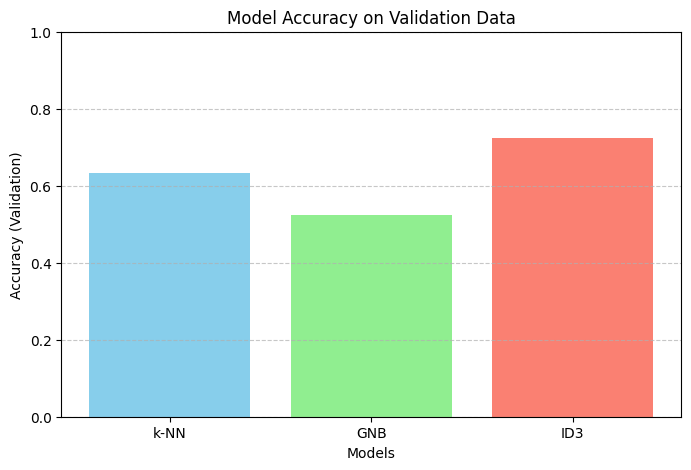

In [9]:
models = ['k-NN', 'GNB', 'ID3']
accuracy_validation = [0.633, 0.5244, 0.723]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracy_validation, color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Models')
plt.ylabel('Accuracy (Validation)')
plt.title('Model Accuracy on Validation Data')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## Model dengan performa terbaik

Berdasarkan hasil prediksi model terhadap data validasi, algoritma terbaik adalah ID3 (dapat dilihat pada grafik). Hal yang serupa juga terjadi pada saat prediksi data test yang di-submit ke kaggle.

## Mengatasi missing values

Untuk bagian missing values, kami memutuskan untuk menanganinya dengan mengubahnya menjadi modus untuk kategorikal dan menjadi mean untuk numerikal. Keputusan ini kami ambil karena persentase data yang hilang untuk setiap feature hanya sekitar 5%. Menurut kami, membuang feature dengan missing data sebaiknya dilakukan apabila persentase data hilangnya tinggi.

## Feature scaling

Satu-satunya model yang baik untuk menggunakan feature scaling berdasarkan implementasi kami adalah Gaussian Naive Bayer. Hal ini disebabkan GNB membutuhkan data dengan nilai-nilai yang scalable agar tidak ada fitur yang mendominasi perhitungan probabilitas.<br>
Untuk model lain, berdasarkan percobaan yang dilakukan, feature scaling membuat hasil prediksi kurang akurat sehingga kami memutuskan untuk tidak